<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Kaggle Competitions: House Prices - Advanced Regression Techniques  @FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Data visualization 📌
</div>

# Import the library

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [6]:
df_train = pd.read_csv('../data/processed/train_processed.csv')

In [7]:
df_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave    No      Reg   
1             20       RL         80.0     9600   Pave    No      Reg   
2             60       RL         68.0    11250   Pave    No      IR1   
3             70       RL         60.0     9550   Pave    No      IR1   
4             60       RL         84.0    14260   Pave    No      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1400          20       FV         62.0     7500   Pave  Pave      Reg   
1401          60       RL         62.0     7917   Pave    No      Reg   
1402          20       RL         85.0    13175   Pave    No      Reg   
1403          70       RL         66.0     9042   Pave    No      Reg   
1404          20       RL         68.0     9717   Pave    No      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1400         Lvl    AllPub    Inside  ...        0     No     No          No   
1401         Lvl    AllPub    Inside  ...        0     No     No          No   
1402         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1403         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1404         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1400       0     10    2009        WD         Normal     185000  
1401       0      8    2007        WD         Normal     175000  
1402       0      2    2010        WD         Normal     210000  
1403    2500      5    2010        WD         Normal     266500  
1404       0      4    2010        WD         Normal     142125  

[1405 rows x 80 columns]

# Visualize data

## House price distribution

count      1405.000000
mean     175632.477580
std       69013.601021
min       35311.000000
25%      129000.000000
50%      160000.000000
75%      208500.000000
max      485000.000000
Name: SalePrice, dtype: float64


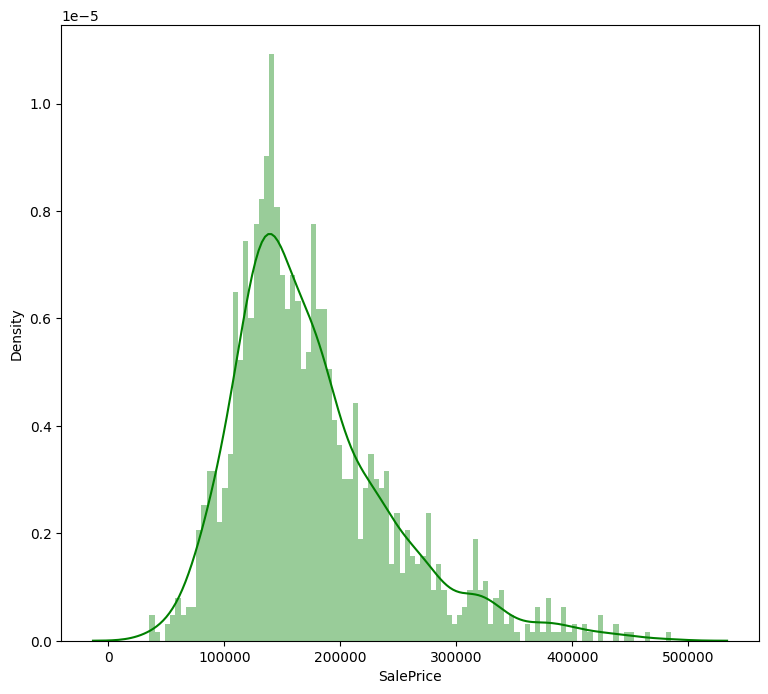

In [8]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

- Majority of houses have SalePrice range from 100000 to 300000

## Numerical distribution

In [9]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

## Histogram

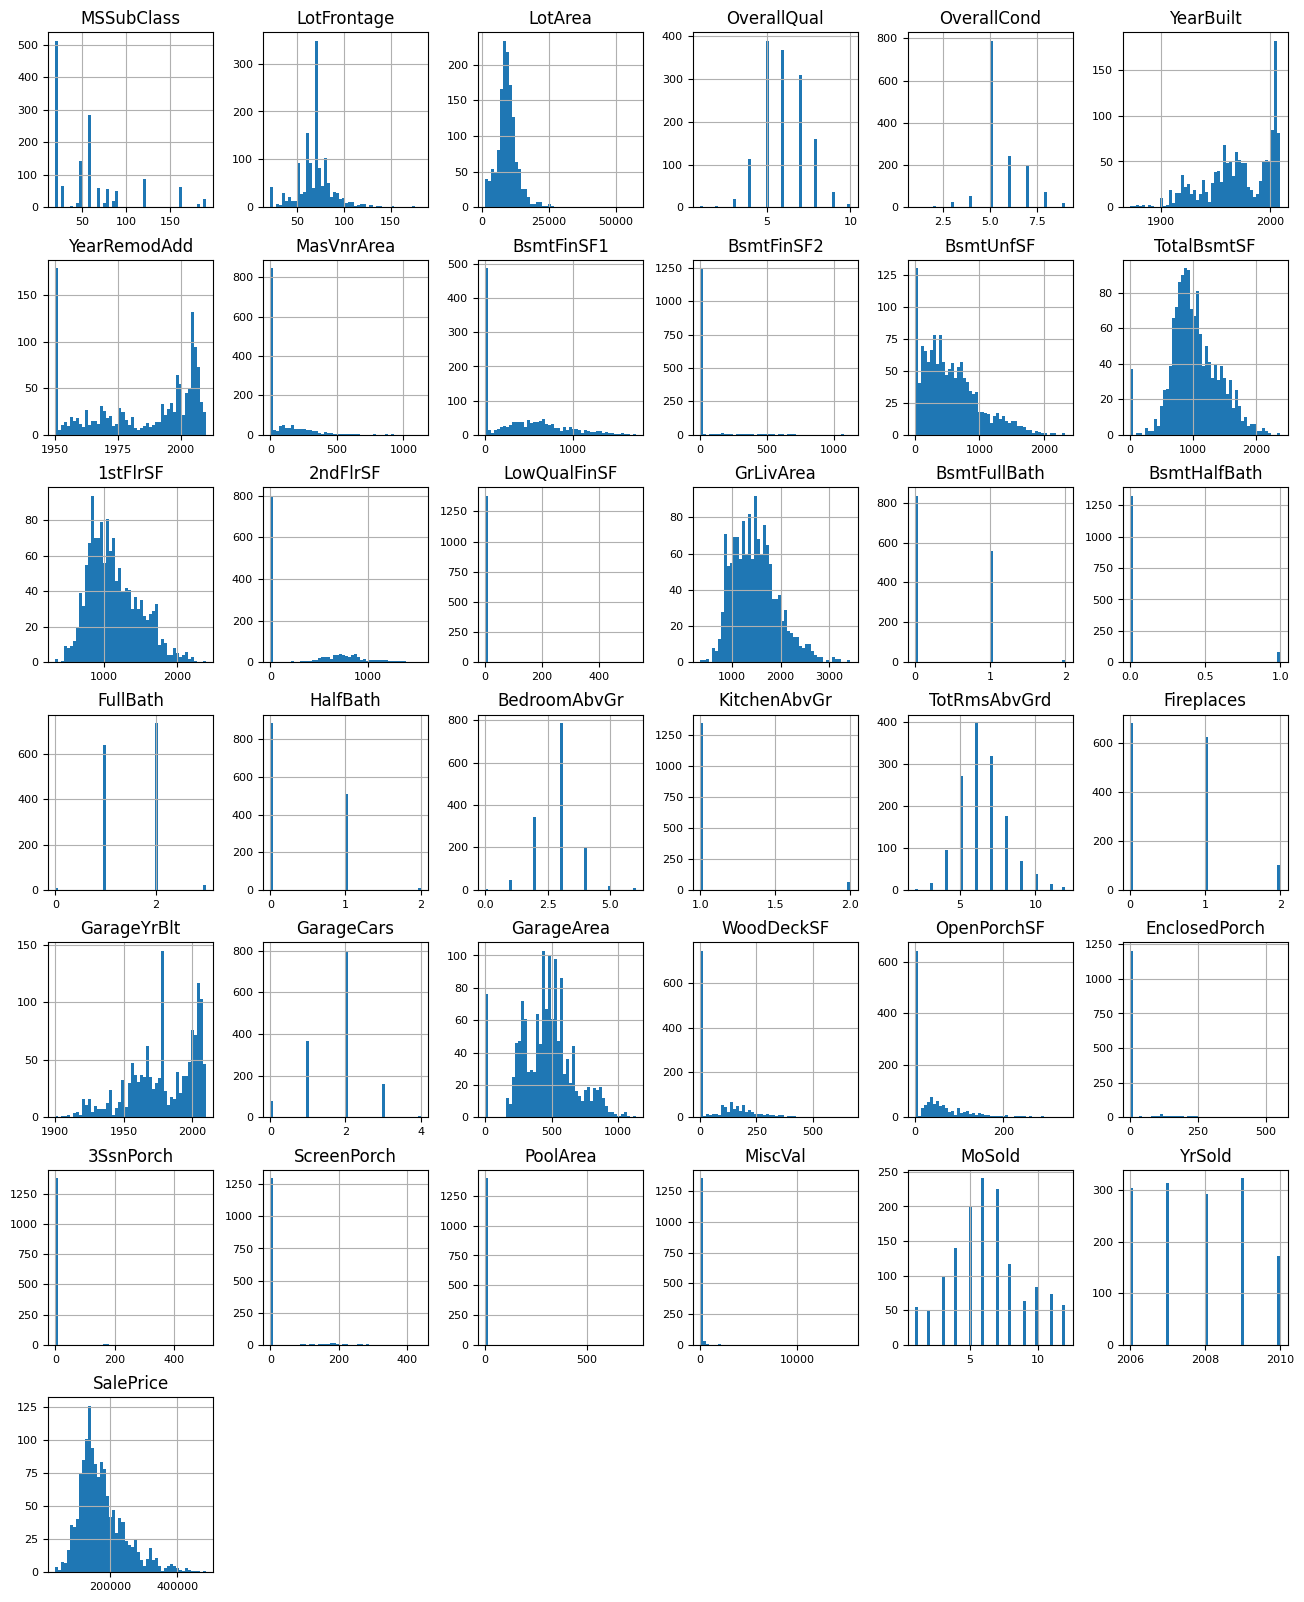

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Heatmap

### Correlation between SalePrice and other numerical columns

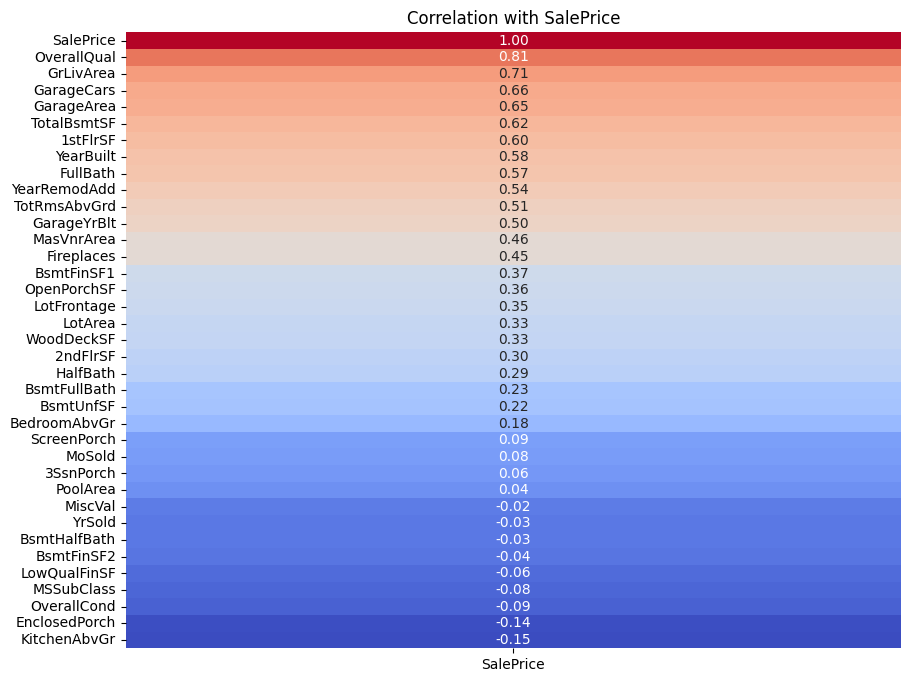

In [11]:
correlation_with_saleprice = df_num.corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_saleprice.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation with SalePrice')
plt.show()

## Scatter plot of each relation between SalePrice and numerical columns

In [12]:
num_features = df_train.select_dtypes(include=np.number).columns


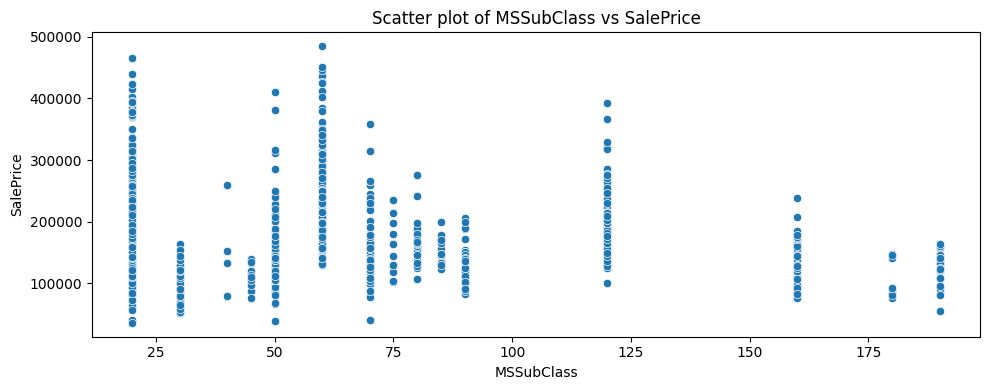

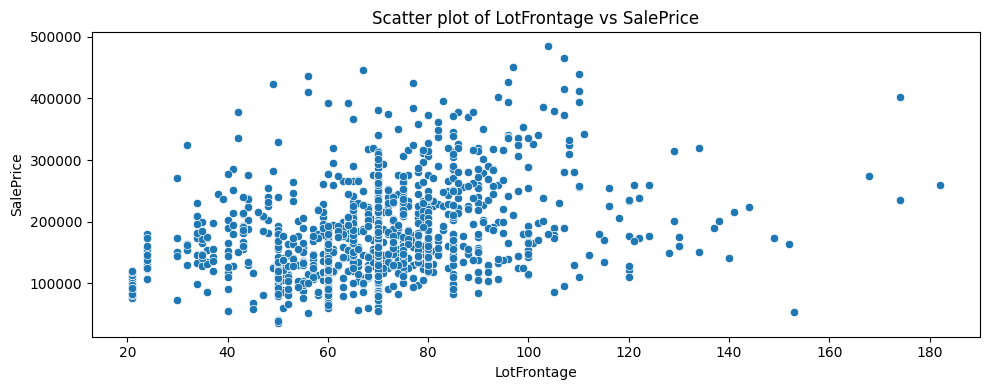

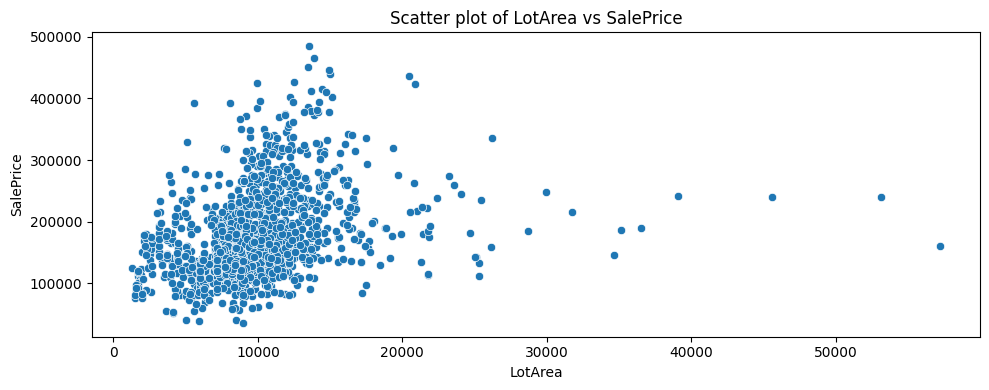

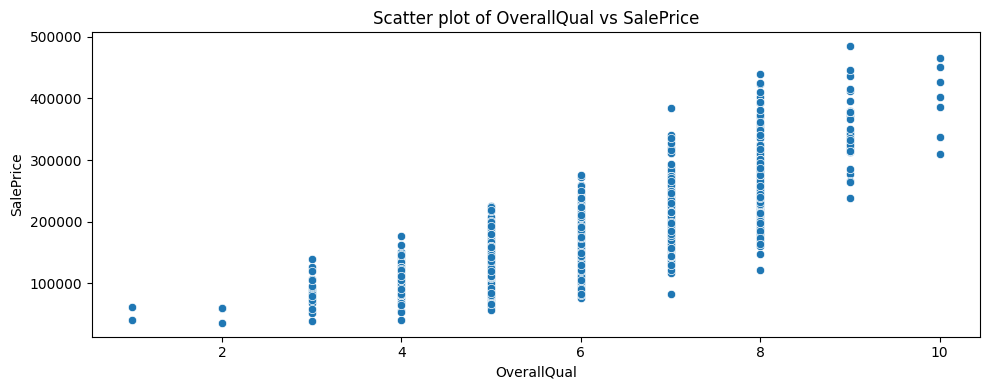

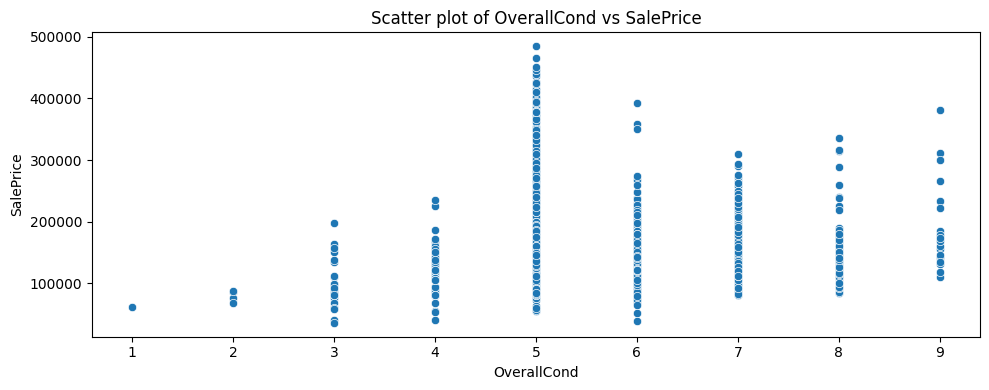

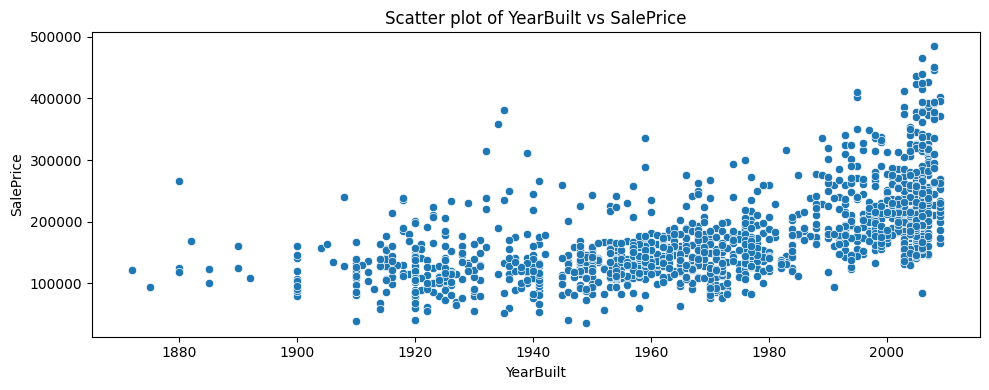

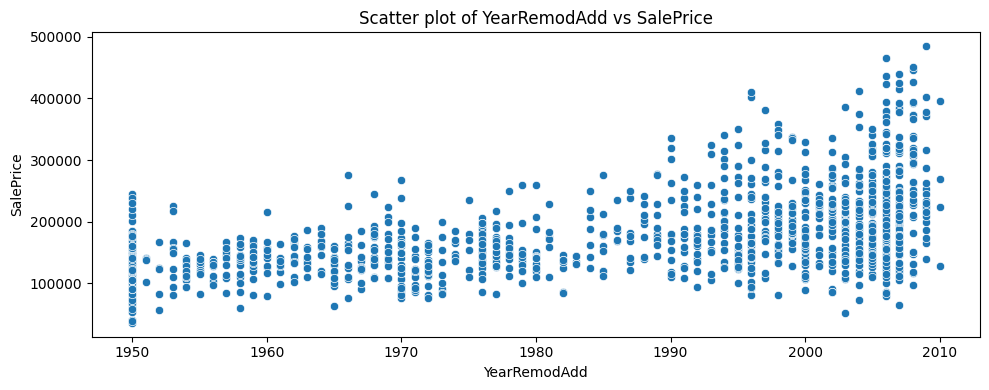

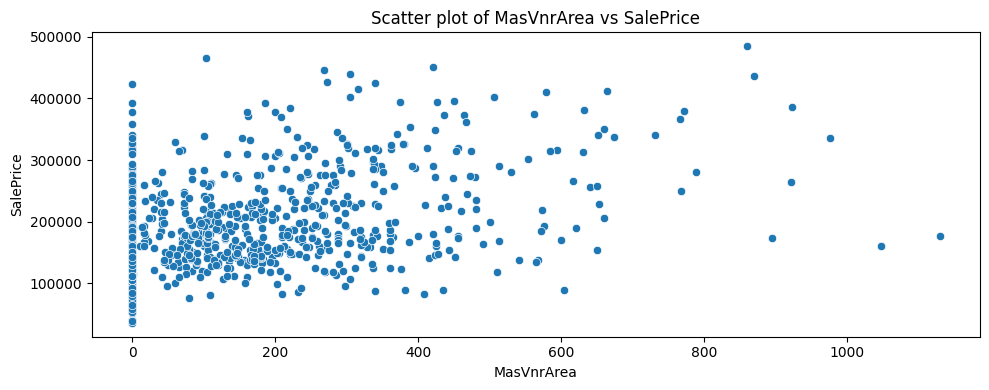

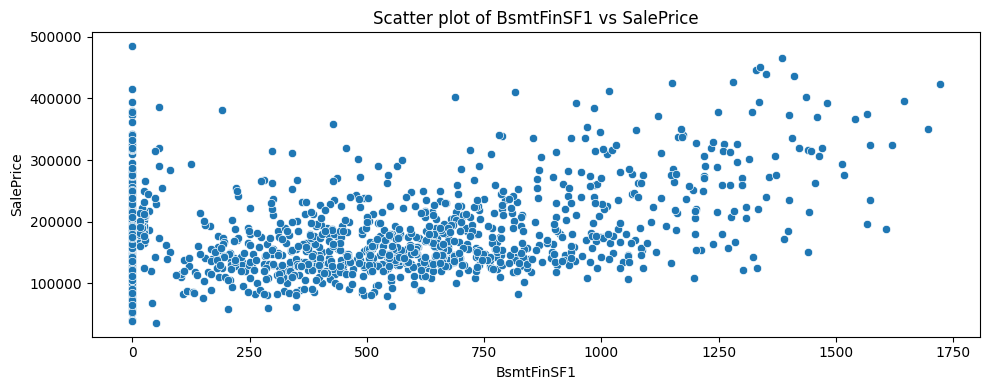

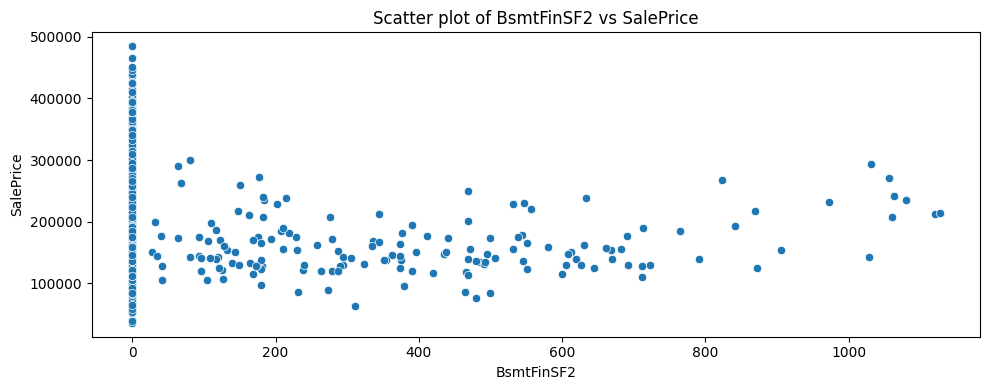

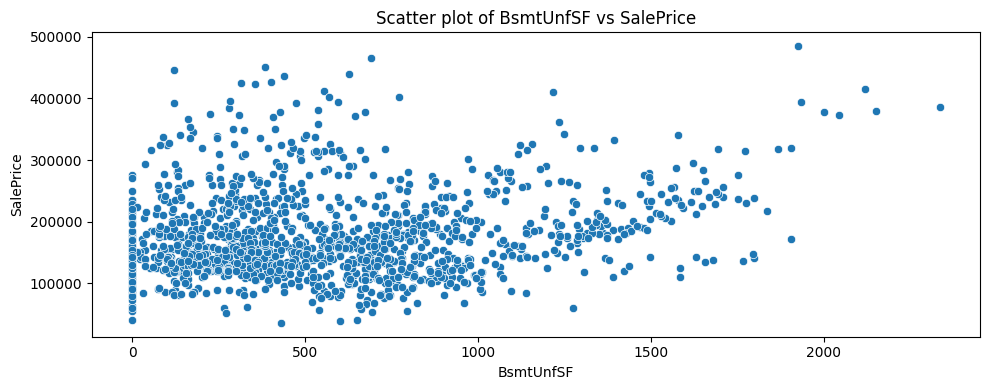

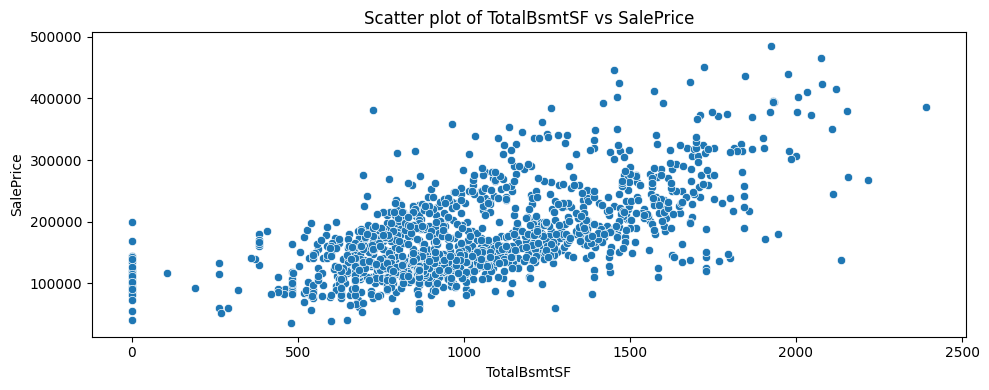

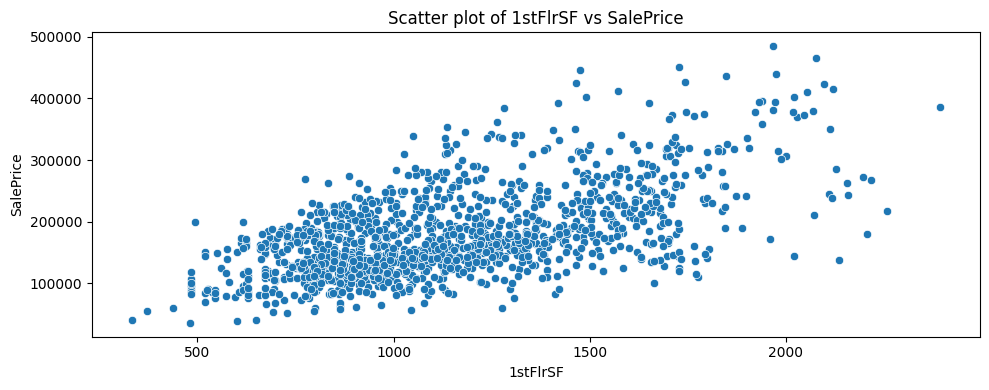

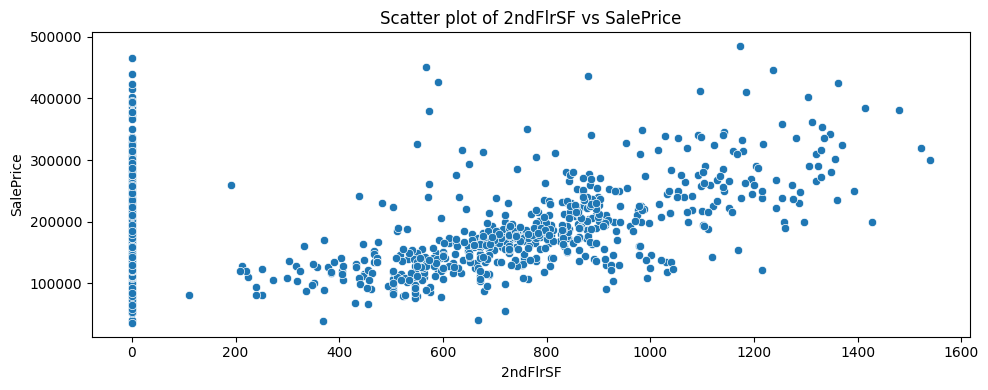

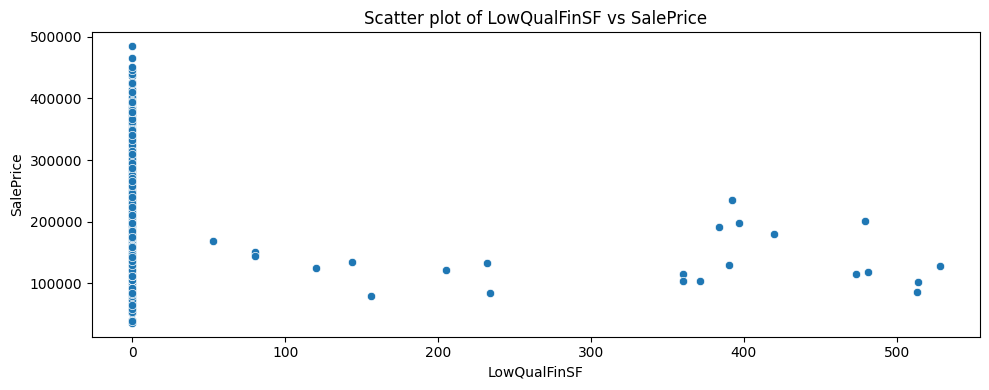

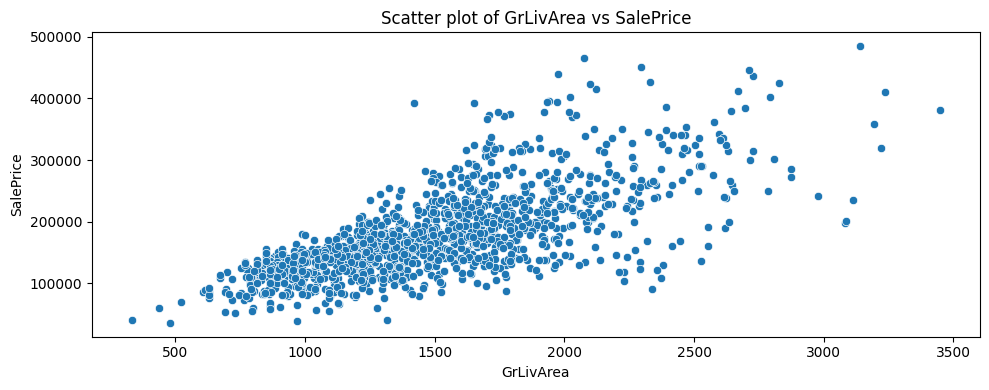

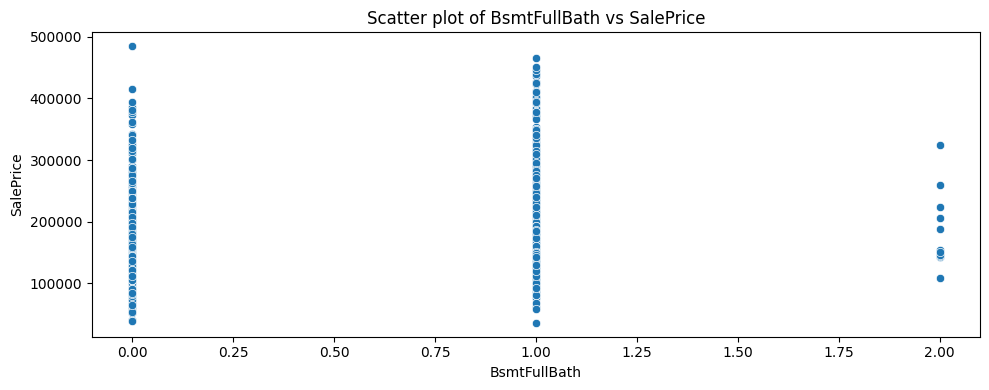

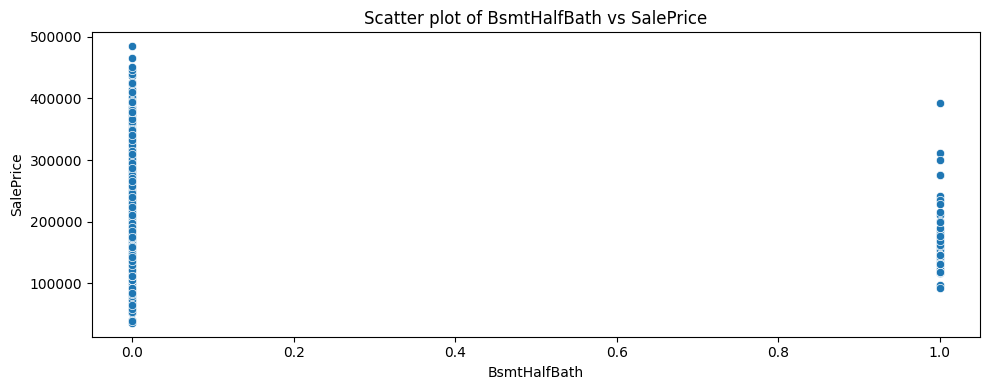

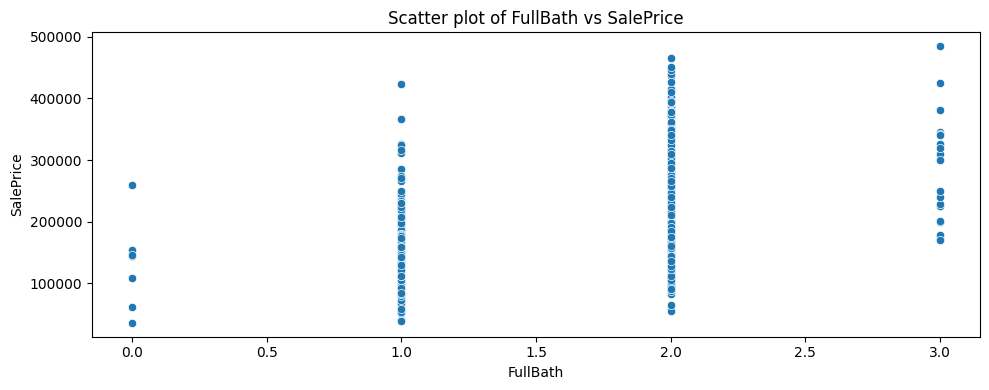

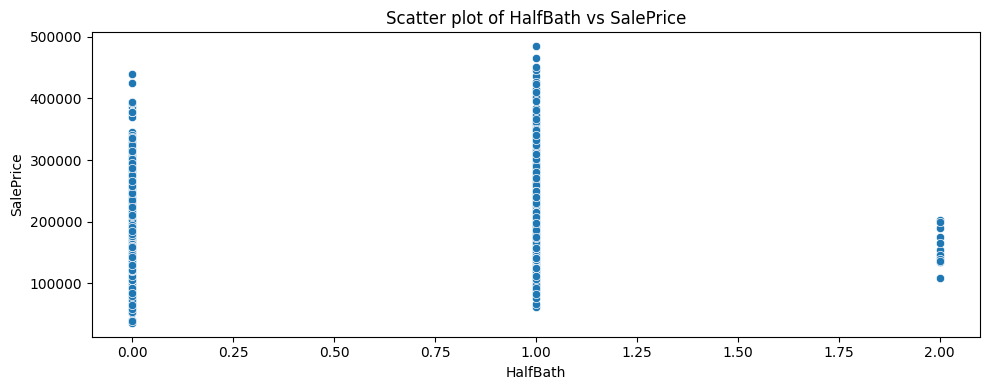

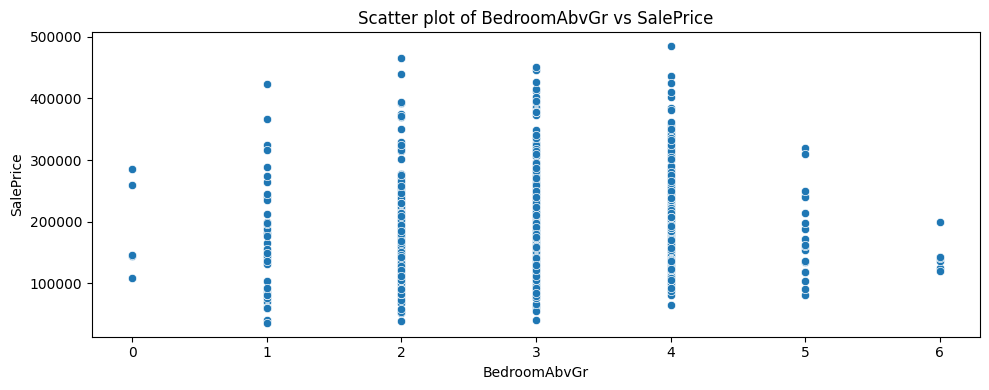

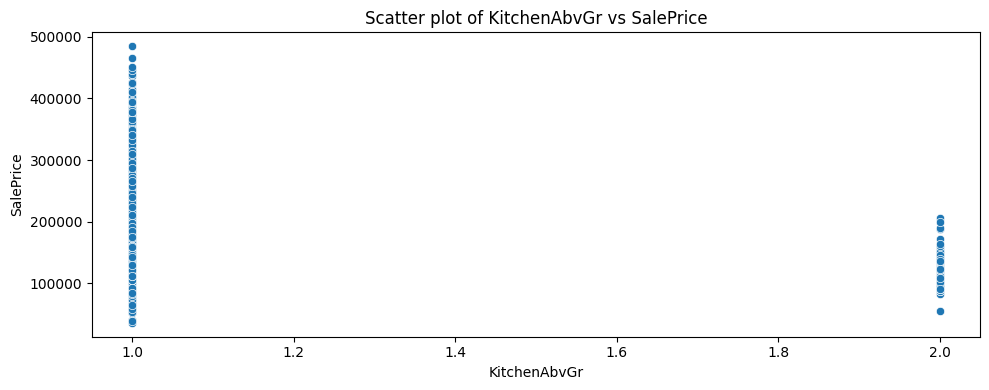

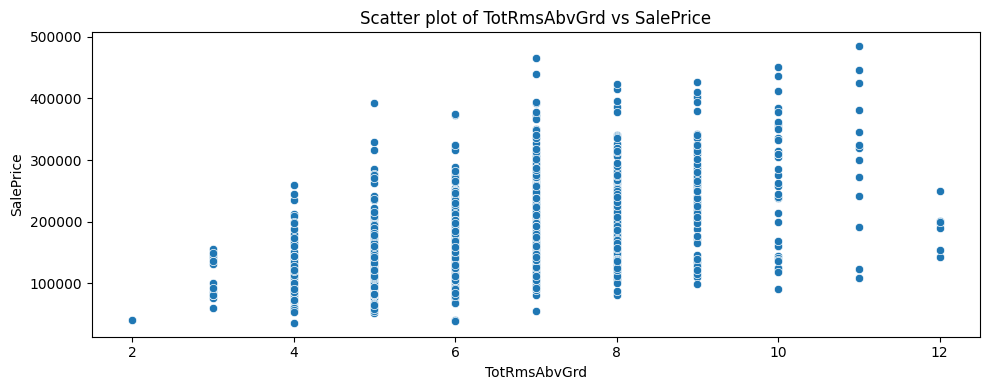

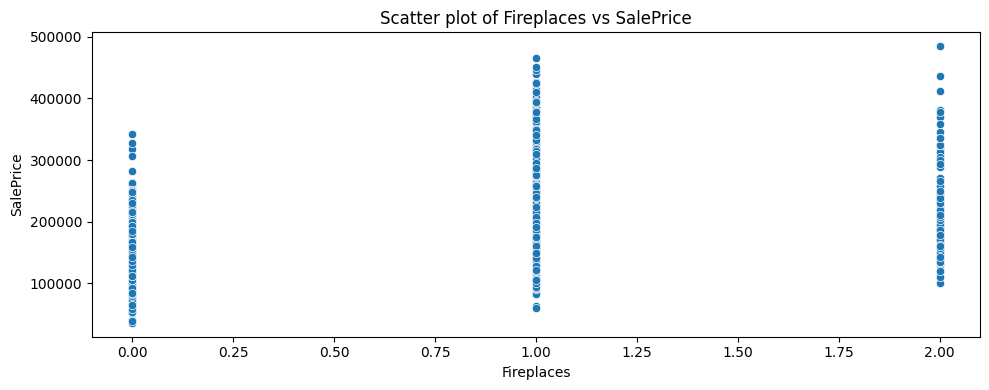

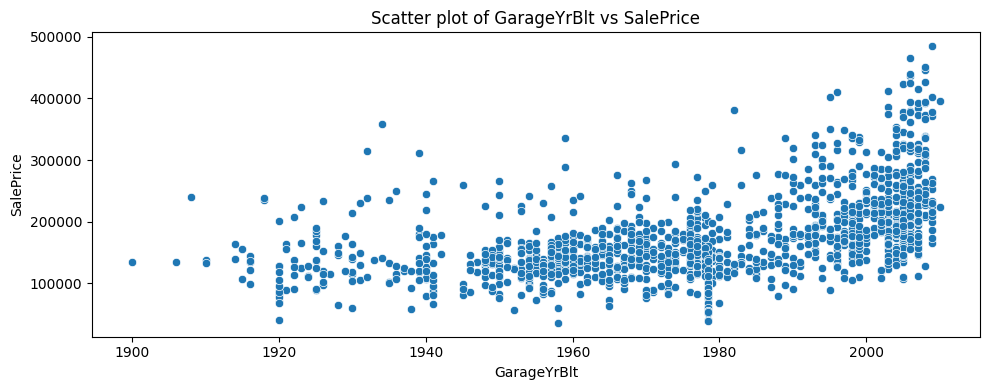

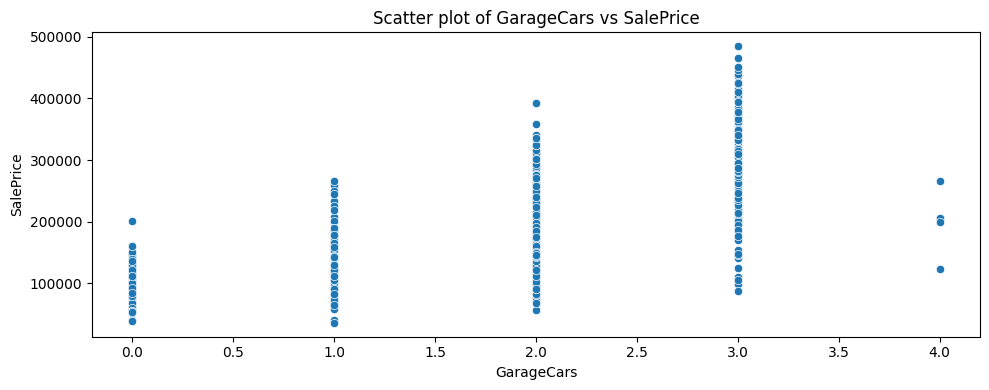

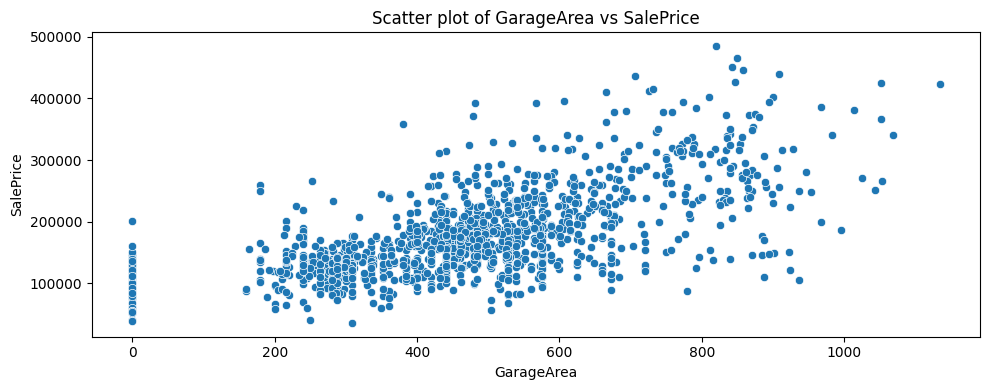

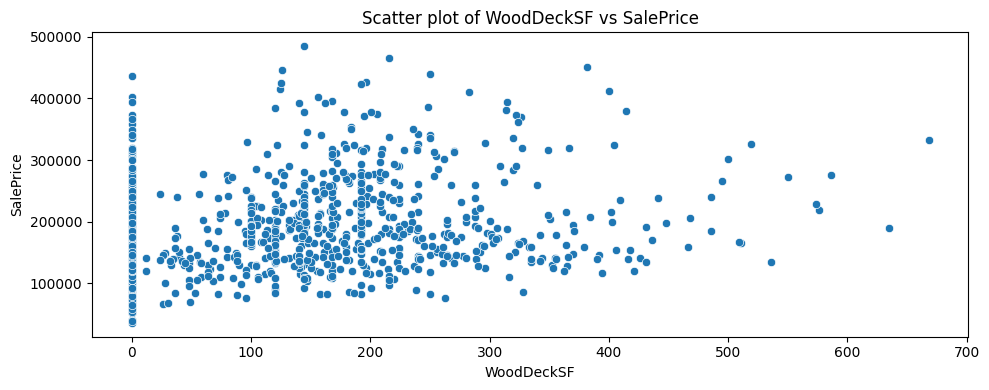

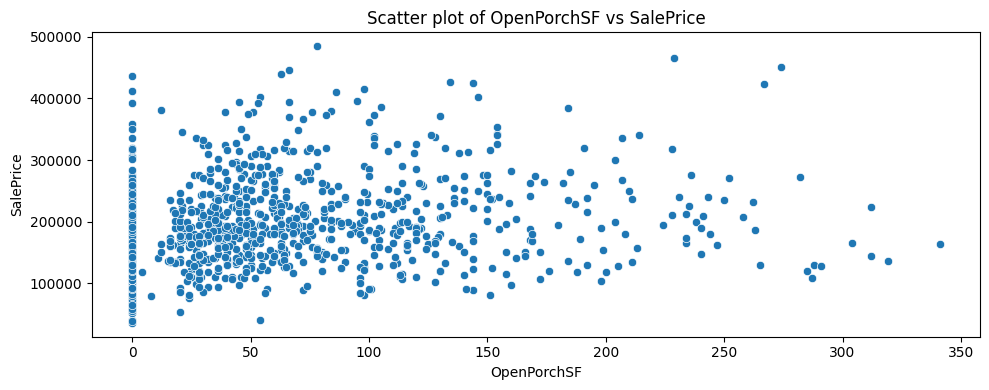

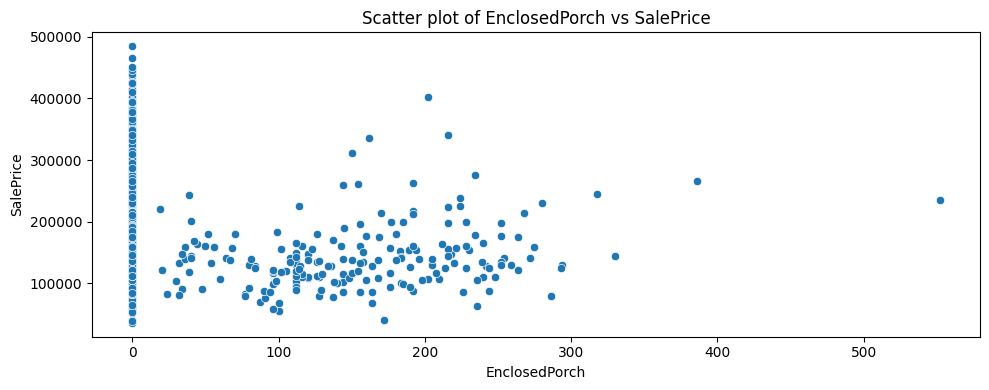

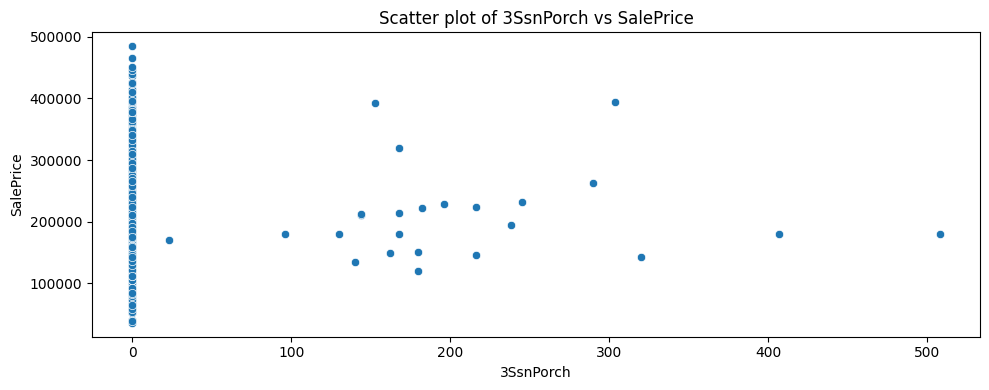

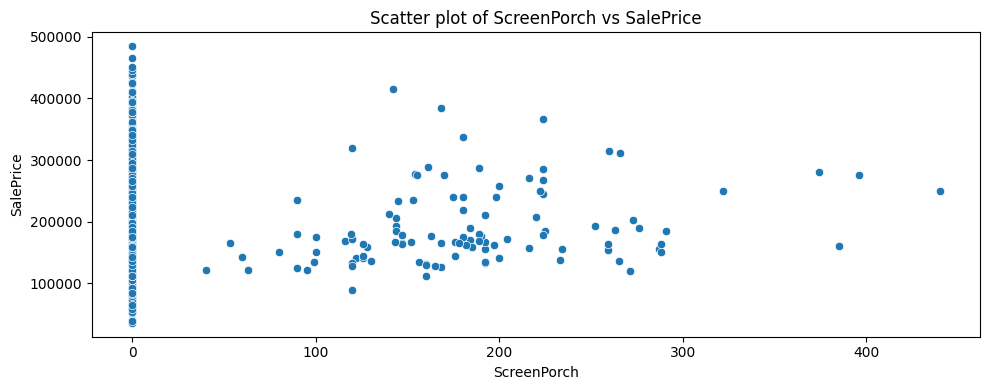

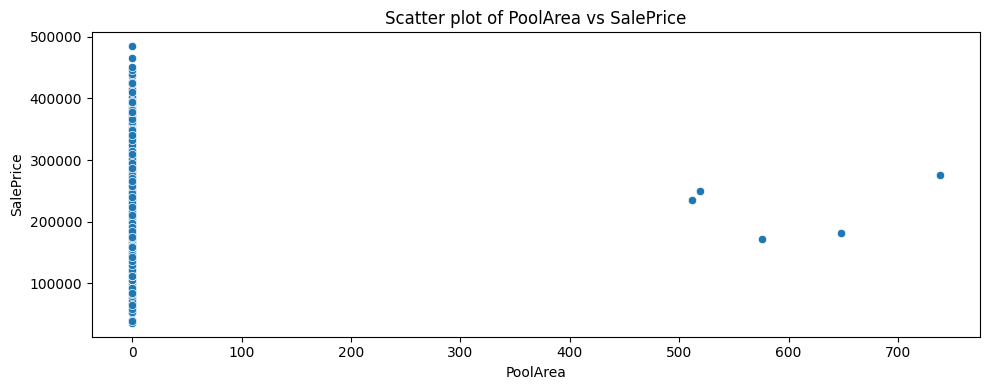

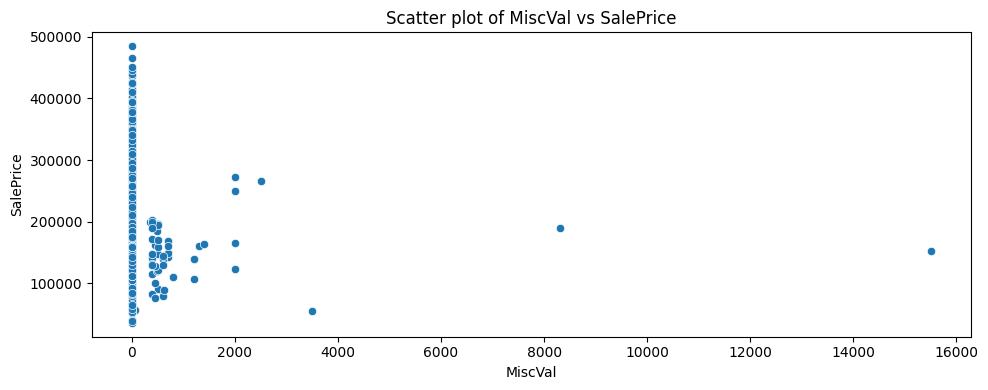

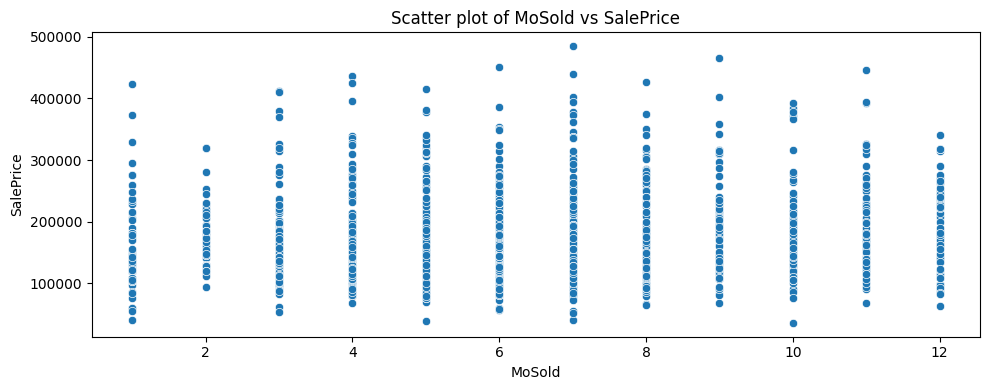

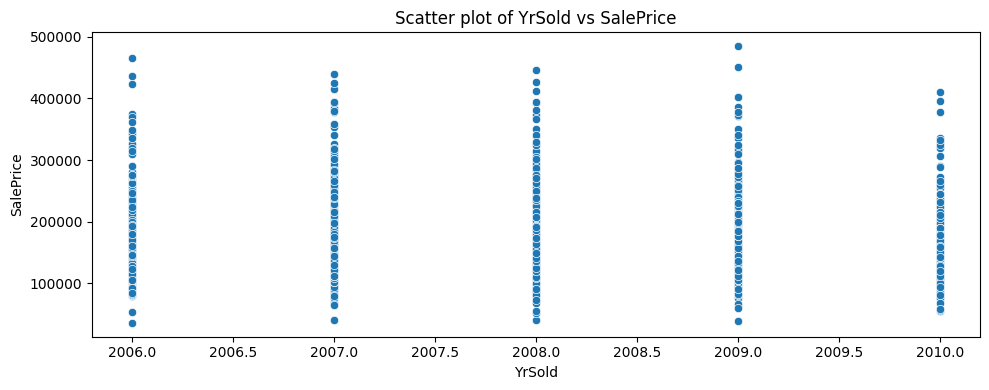

In [13]:
# Vẽ scatter plot cho từng đặc trưng
for feature in num_features[num_features != 'SalePrice']:
    fig, ax = plt.subplots(figsize=(10, 4))

    ax.set_title("Scatter plot of {} vs SalePrice".format(feature))
    sns.scatterplot(data=df_train, x=feature, y='SalePrice', ax=ax)

    plt.tight_layout()
    plt.show()

## Categorical plot (Box plot) of each relation between SalePrice and categorical columns

In [14]:
cat_features = df_train.select_dtypes(include=object).columns

<Figure size 3000x1000 with 0 Axes>

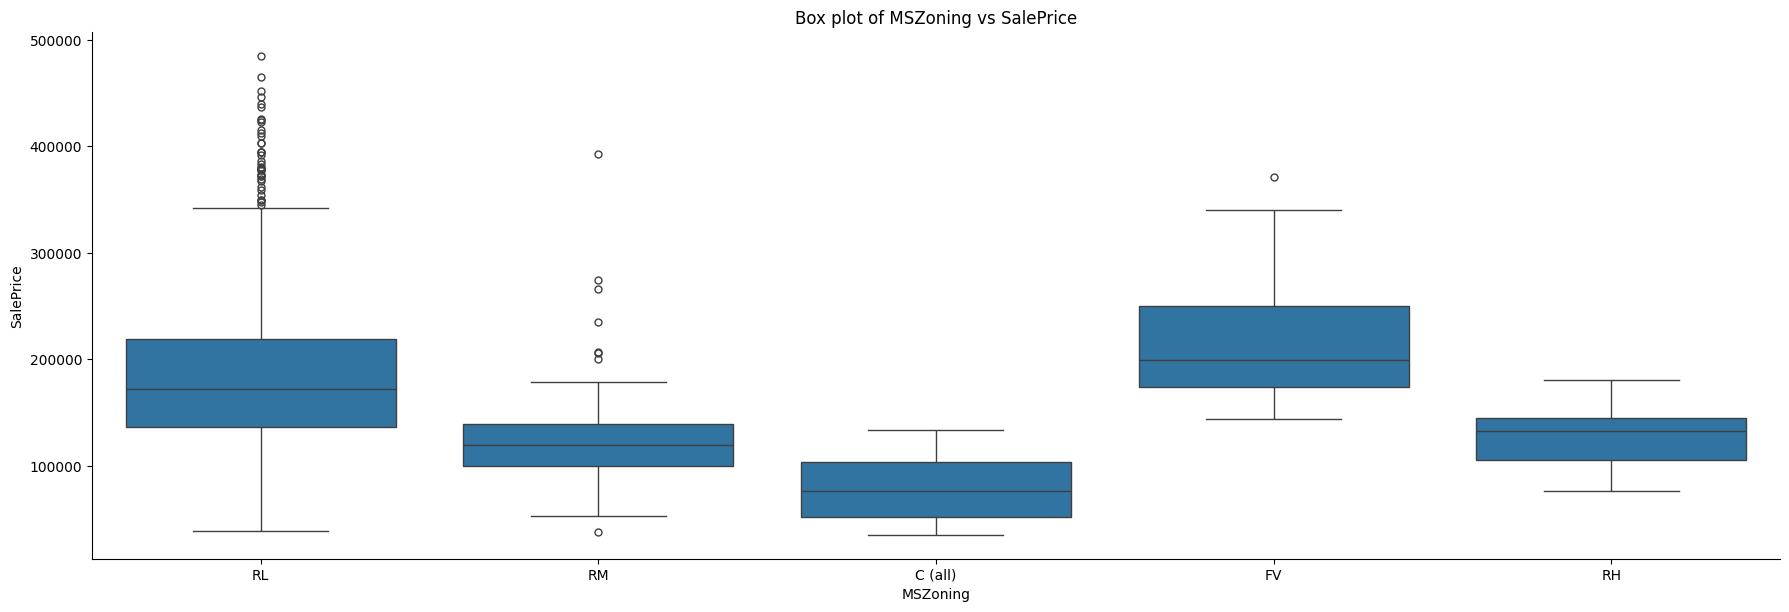

<Figure size 3000x1000 with 0 Axes>

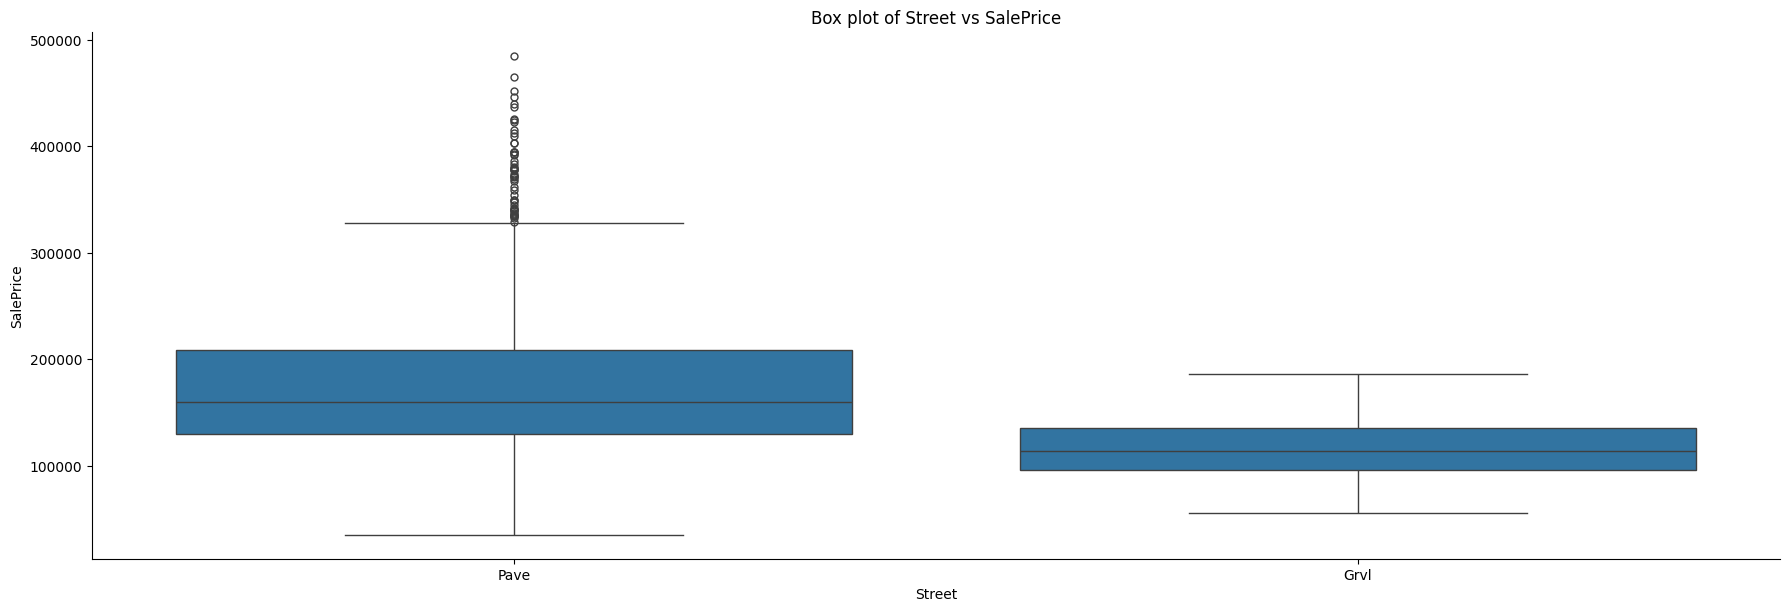

<Figure size 3000x1000 with 0 Axes>

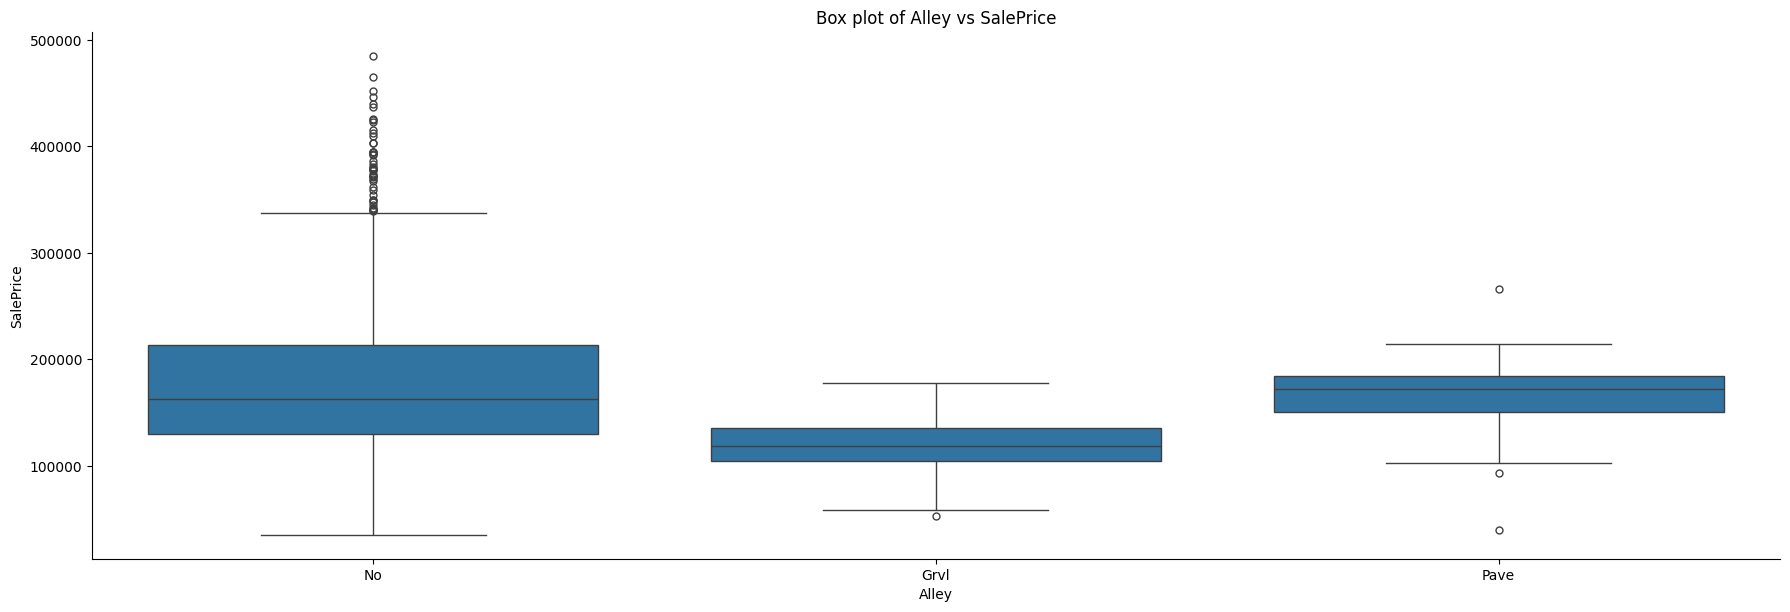

<Figure size 3000x1000 with 0 Axes>

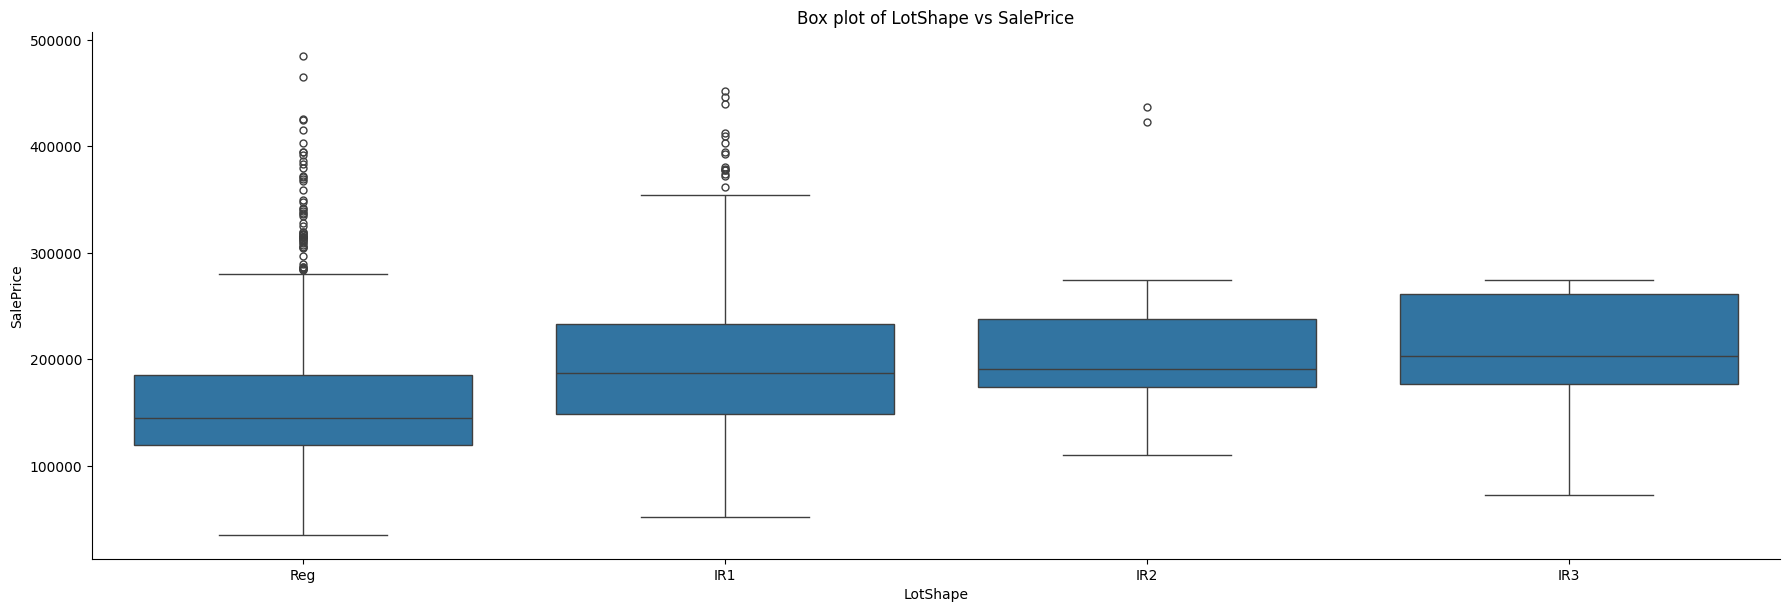

<Figure size 3000x1000 with 0 Axes>

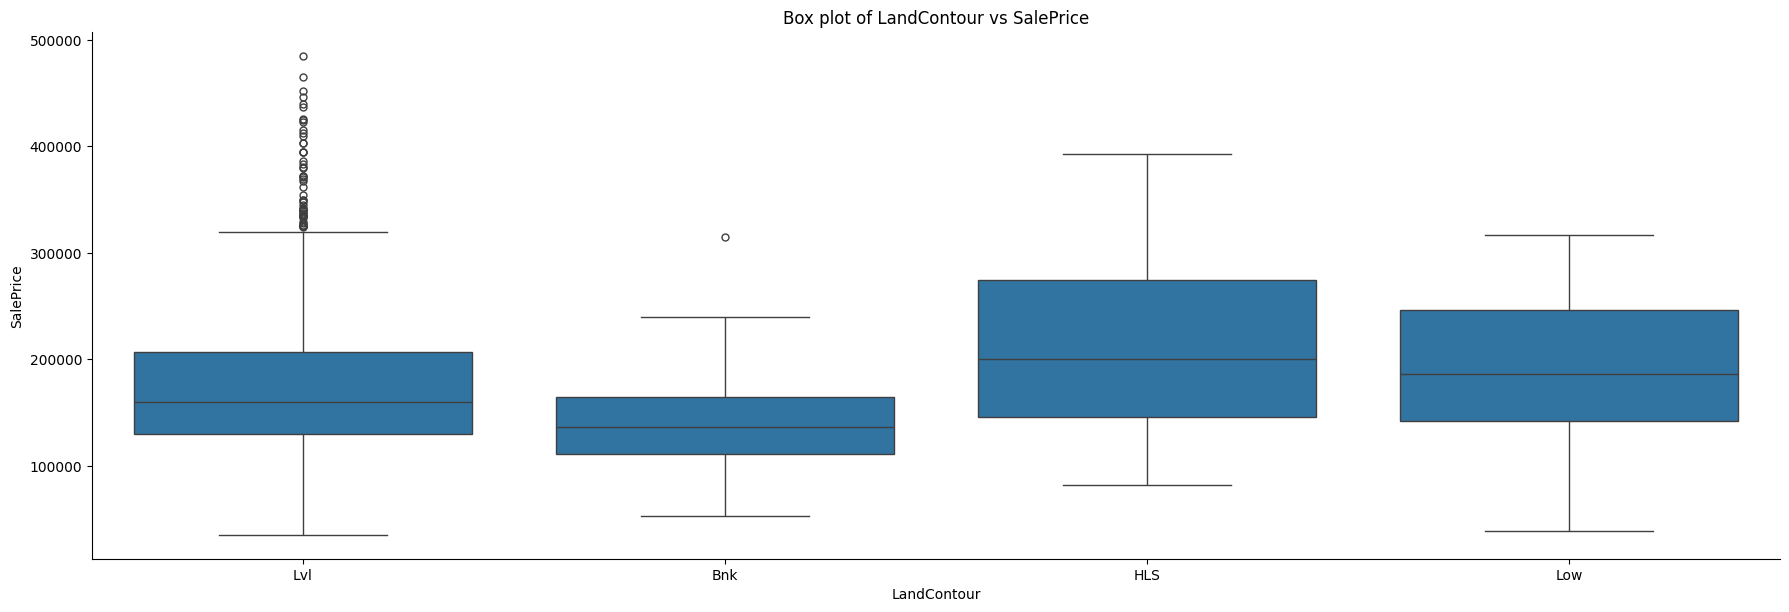

<Figure size 3000x1000 with 0 Axes>

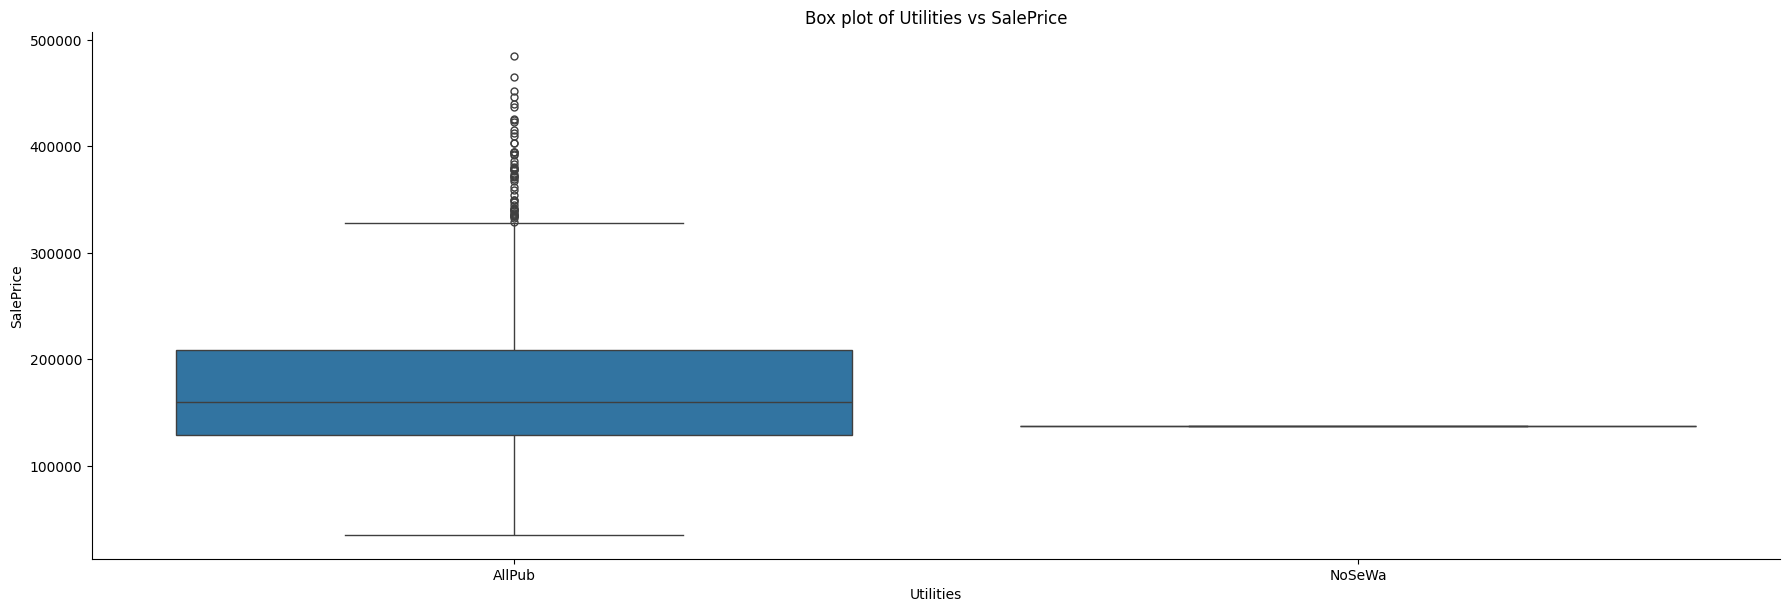

<Figure size 3000x1000 with 0 Axes>

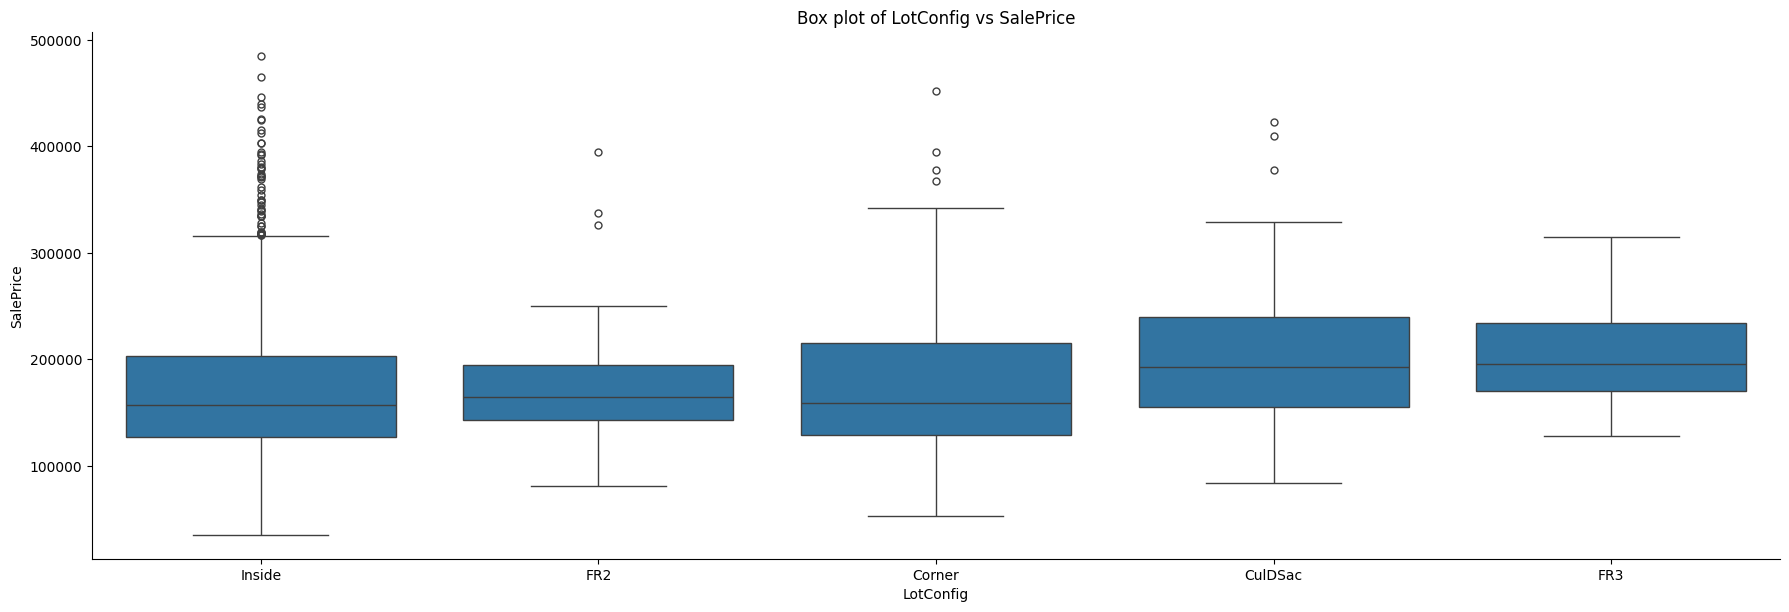

<Figure size 3000x1000 with 0 Axes>

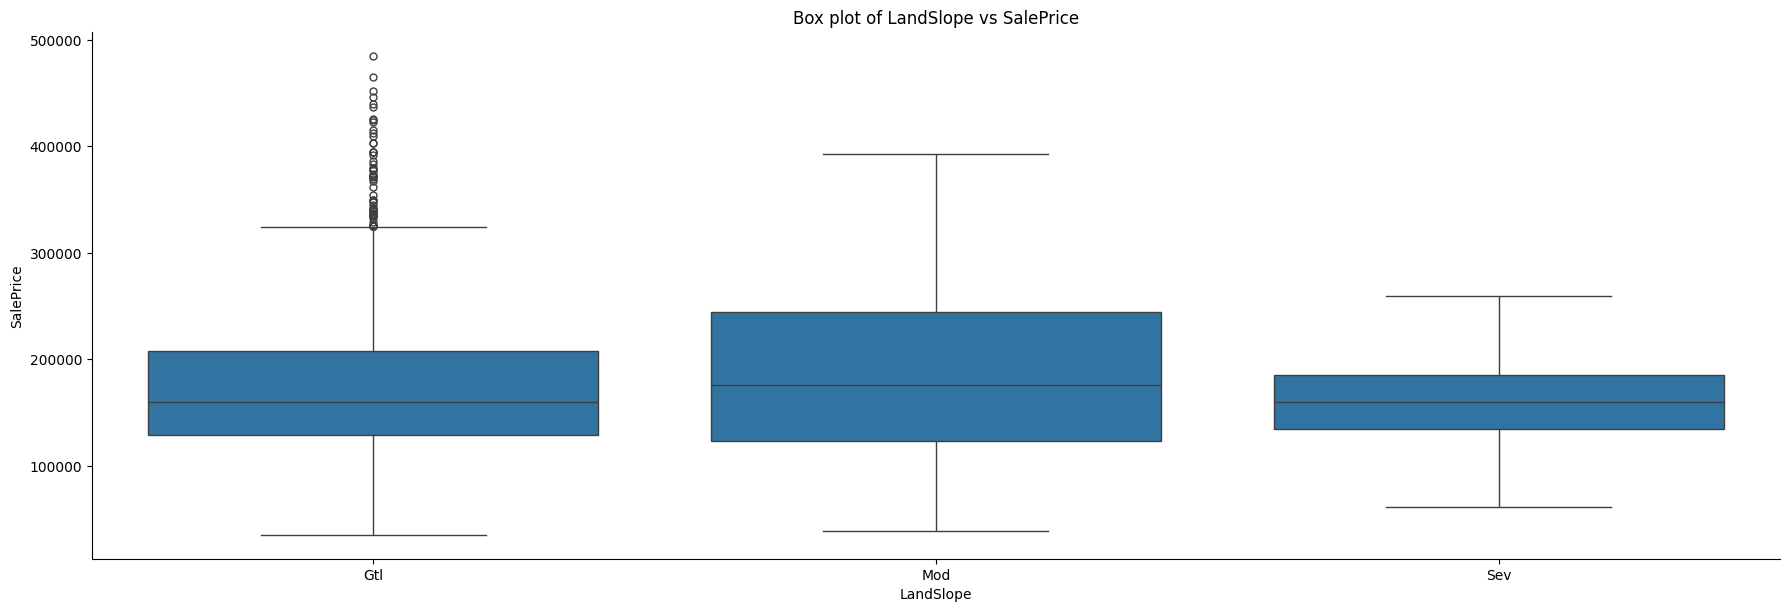

<Figure size 3000x1000 with 0 Axes>

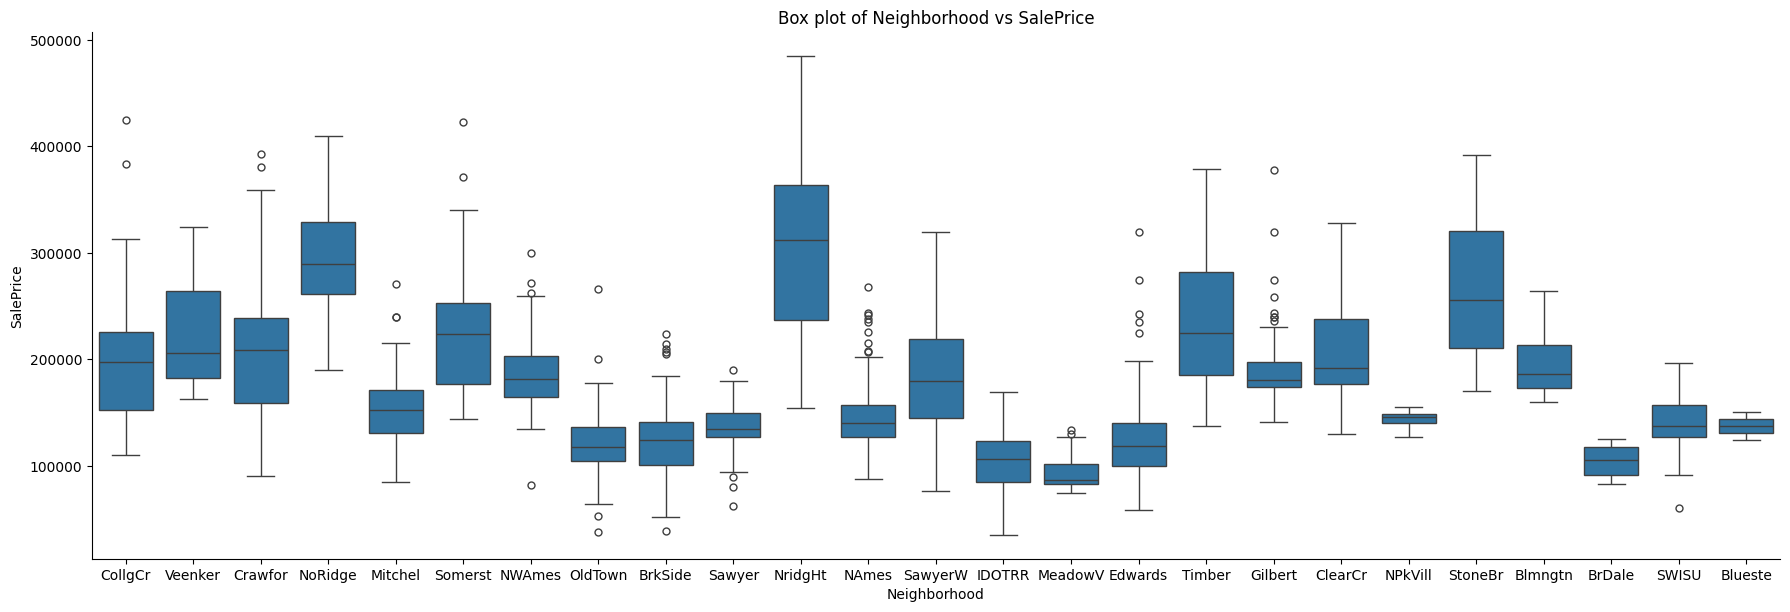

<Figure size 3000x1000 with 0 Axes>

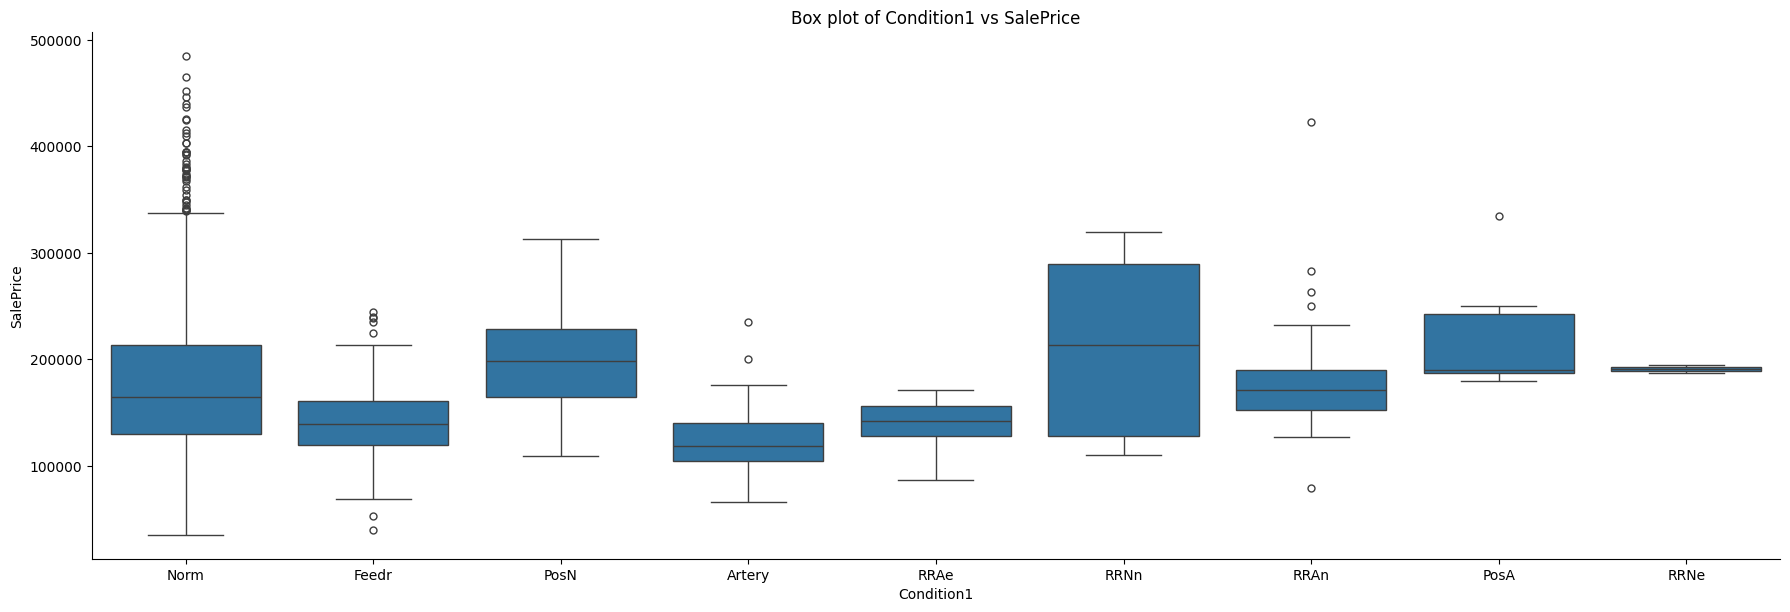

<Figure size 3000x1000 with 0 Axes>

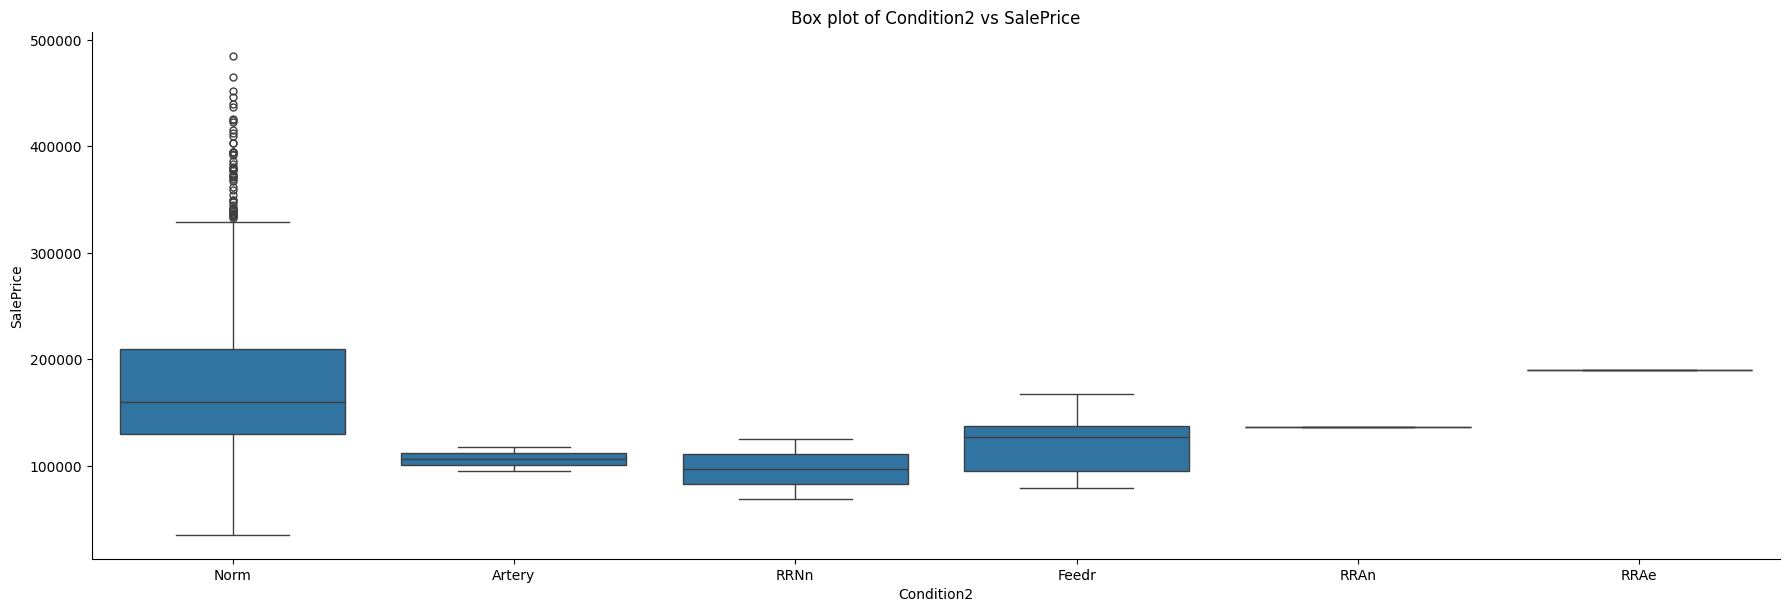

<Figure size 3000x1000 with 0 Axes>

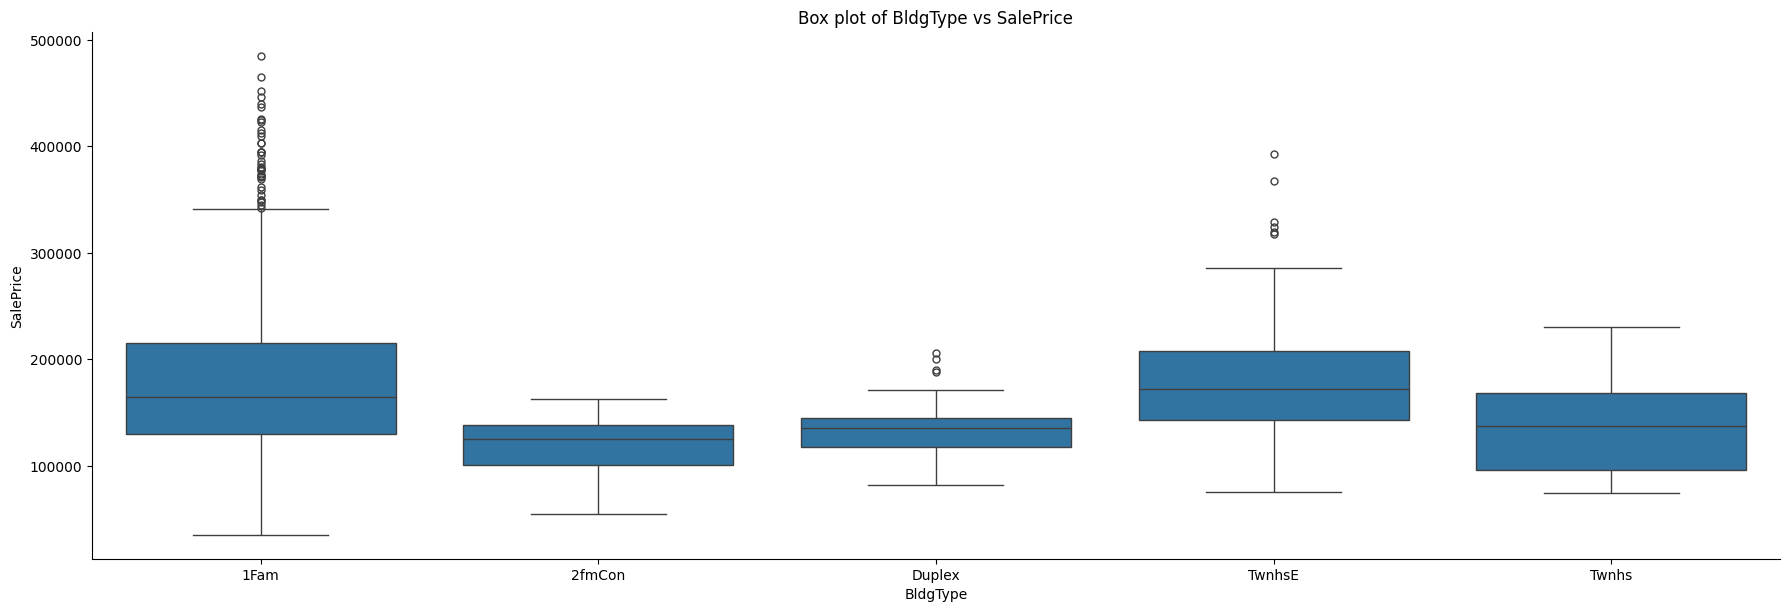

<Figure size 3000x1000 with 0 Axes>

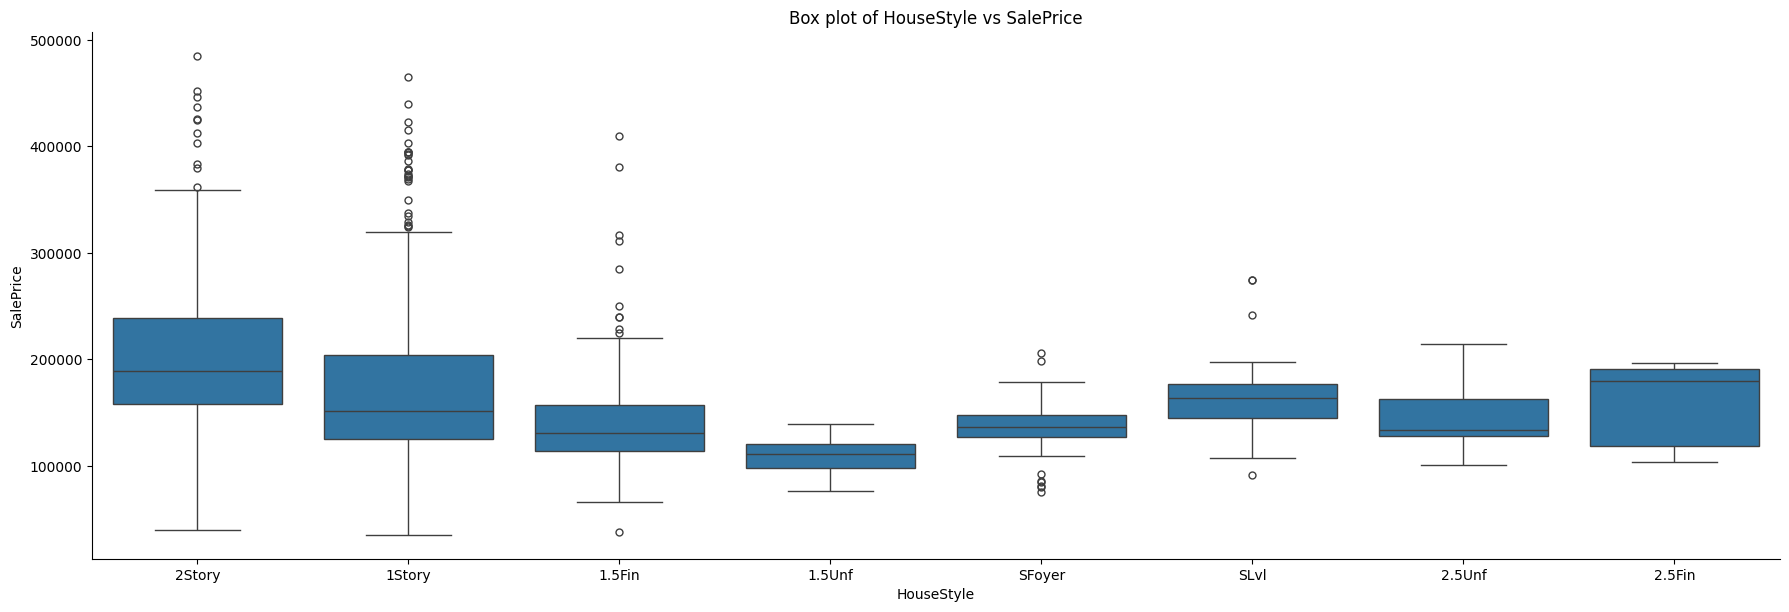

<Figure size 3000x1000 with 0 Axes>

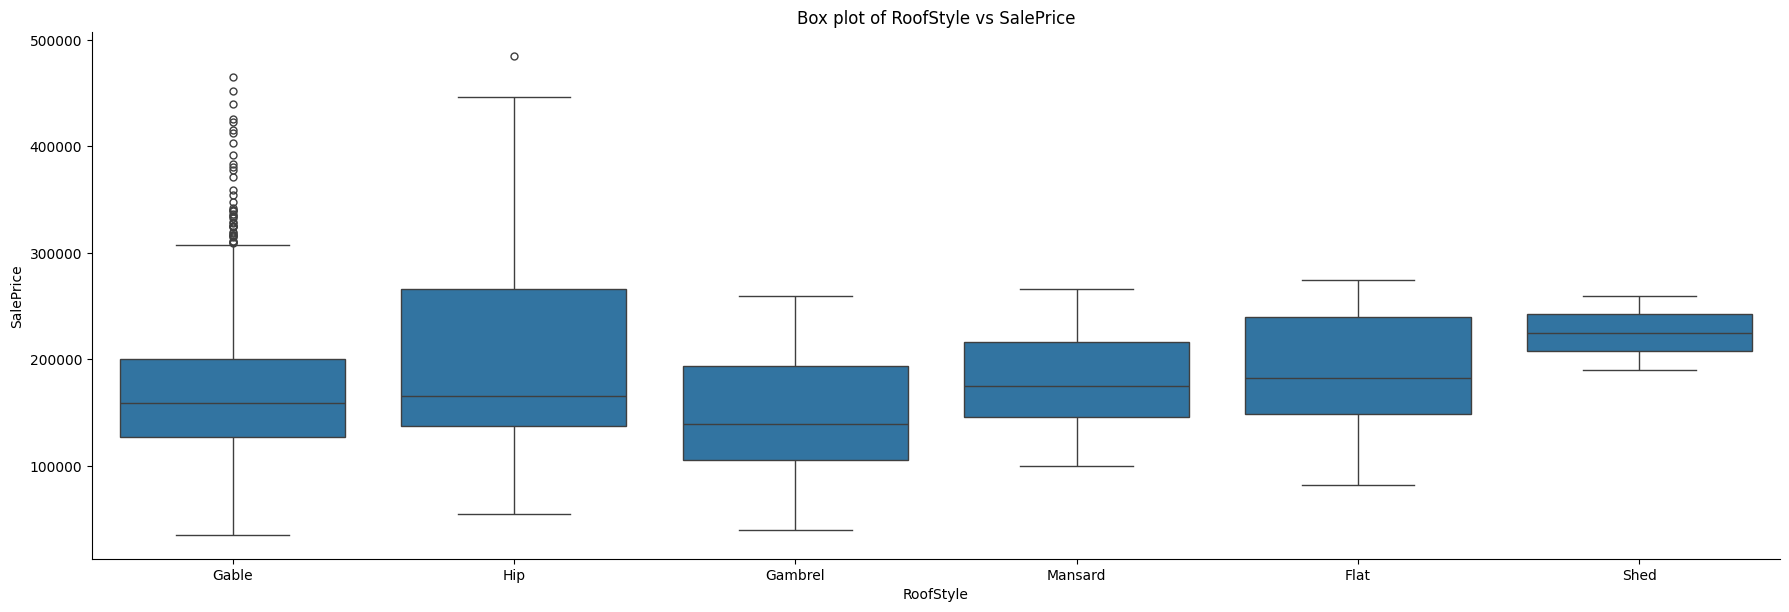

<Figure size 3000x1000 with 0 Axes>

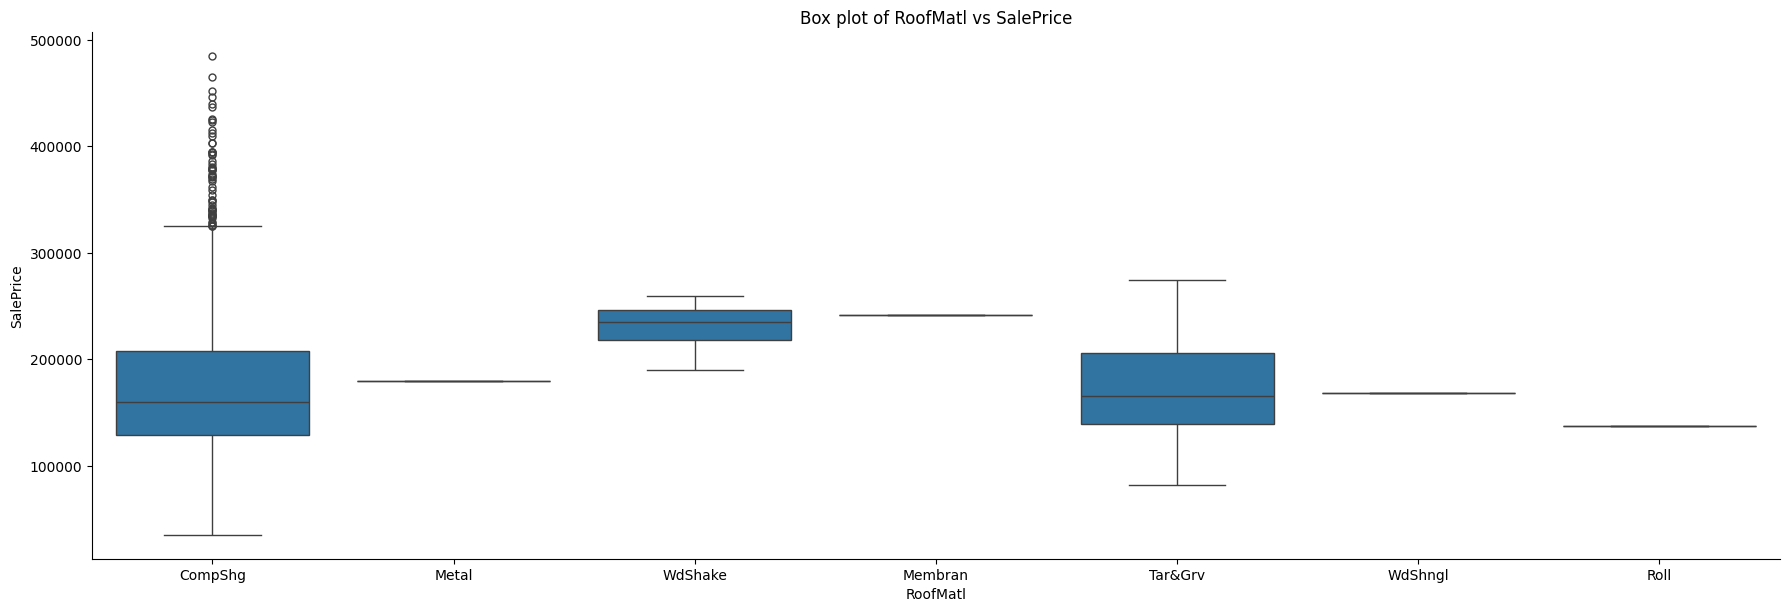

<Figure size 3000x1000 with 0 Axes>

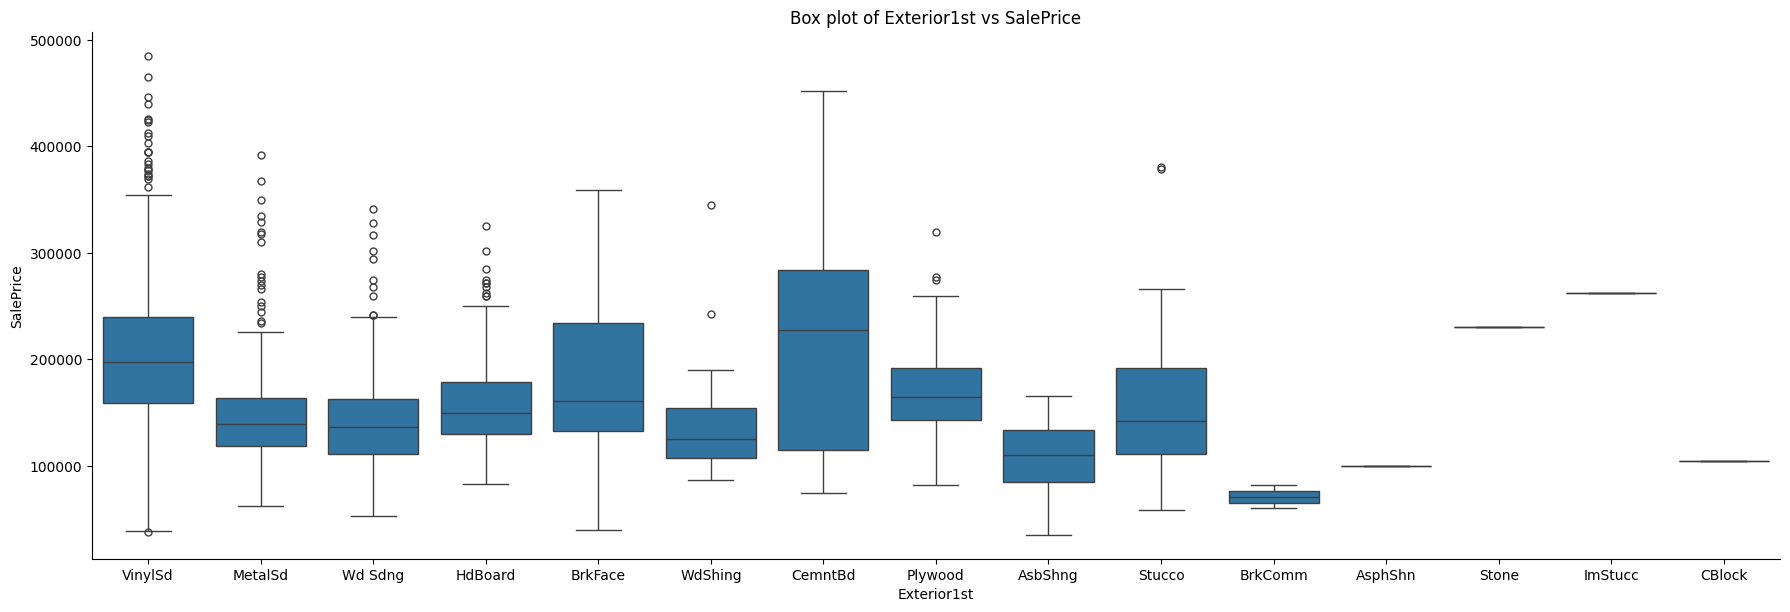

<Figure size 3000x1000 with 0 Axes>

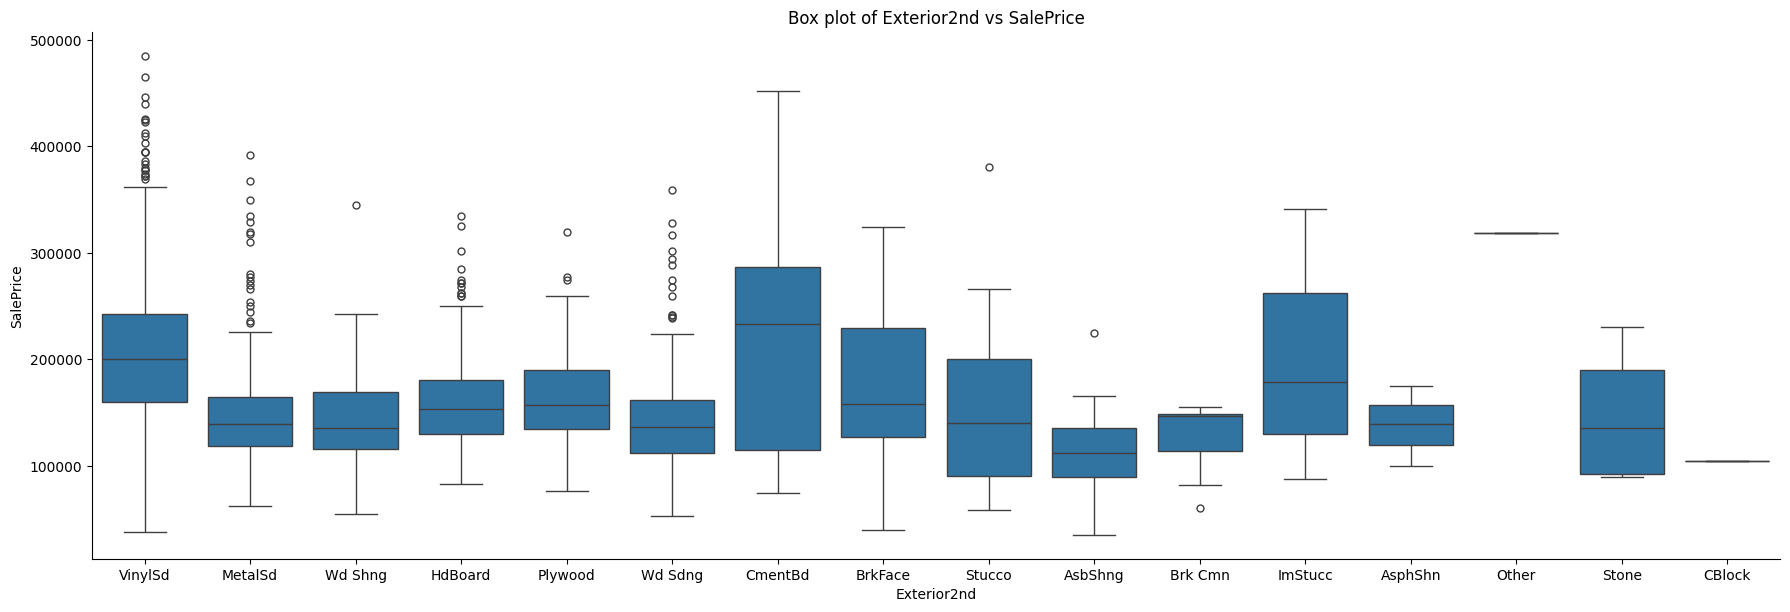

<Figure size 3000x1000 with 0 Axes>

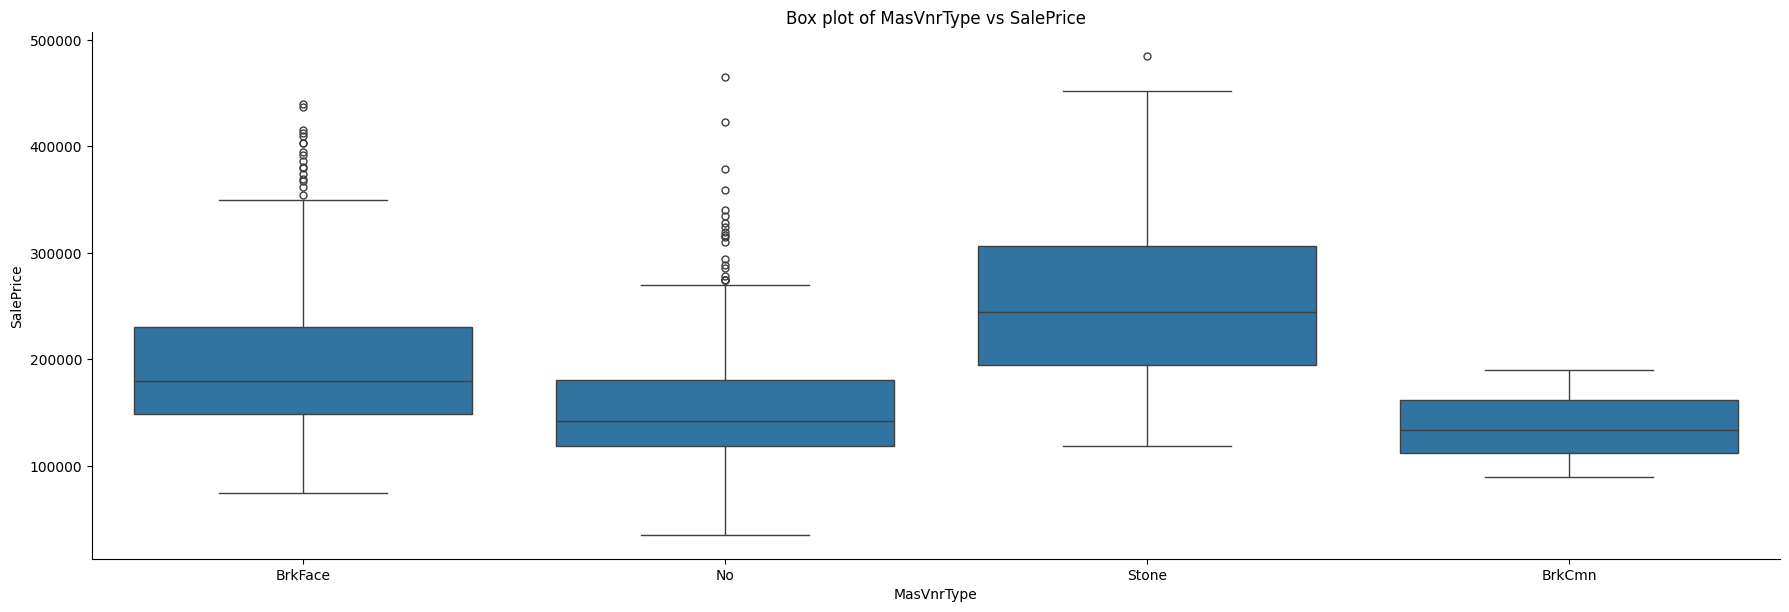

<Figure size 3000x1000 with 0 Axes>

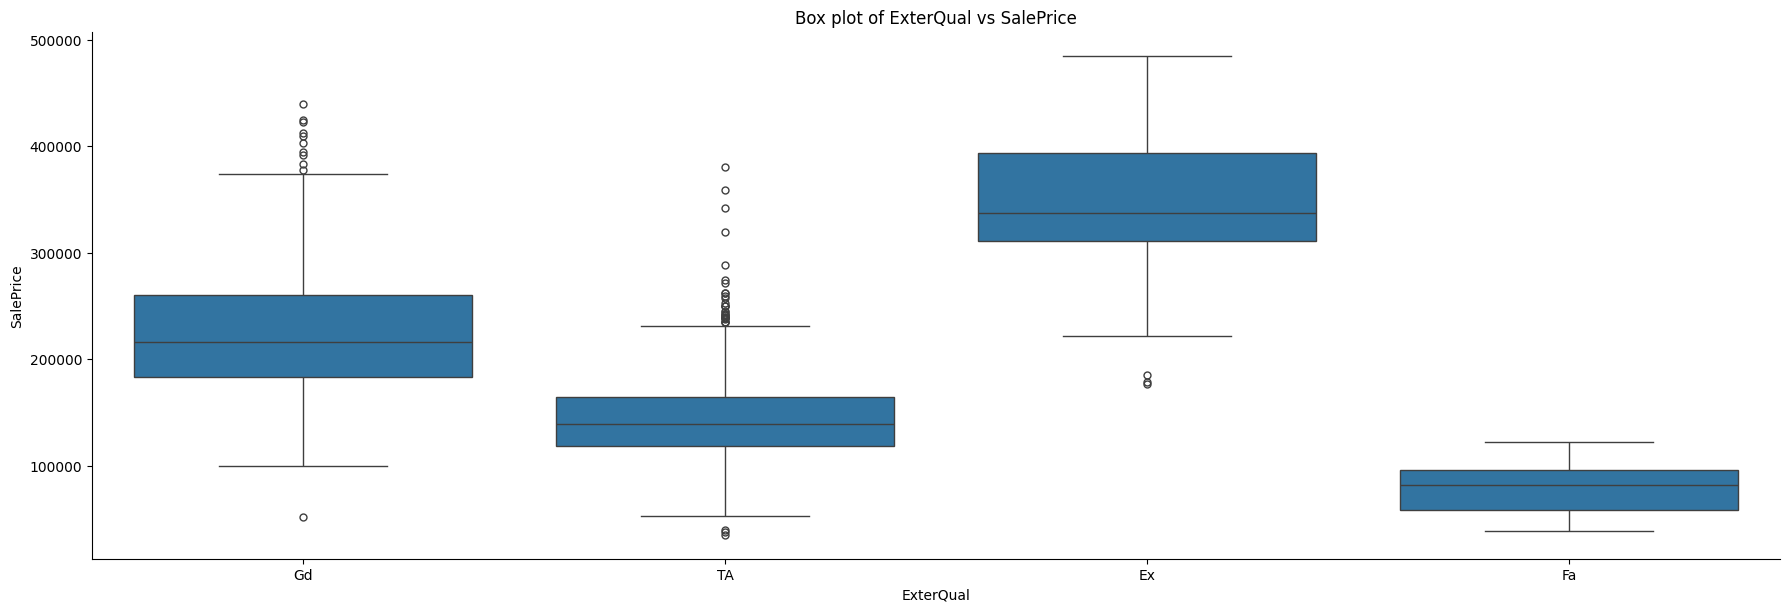

<Figure size 3000x1000 with 0 Axes>

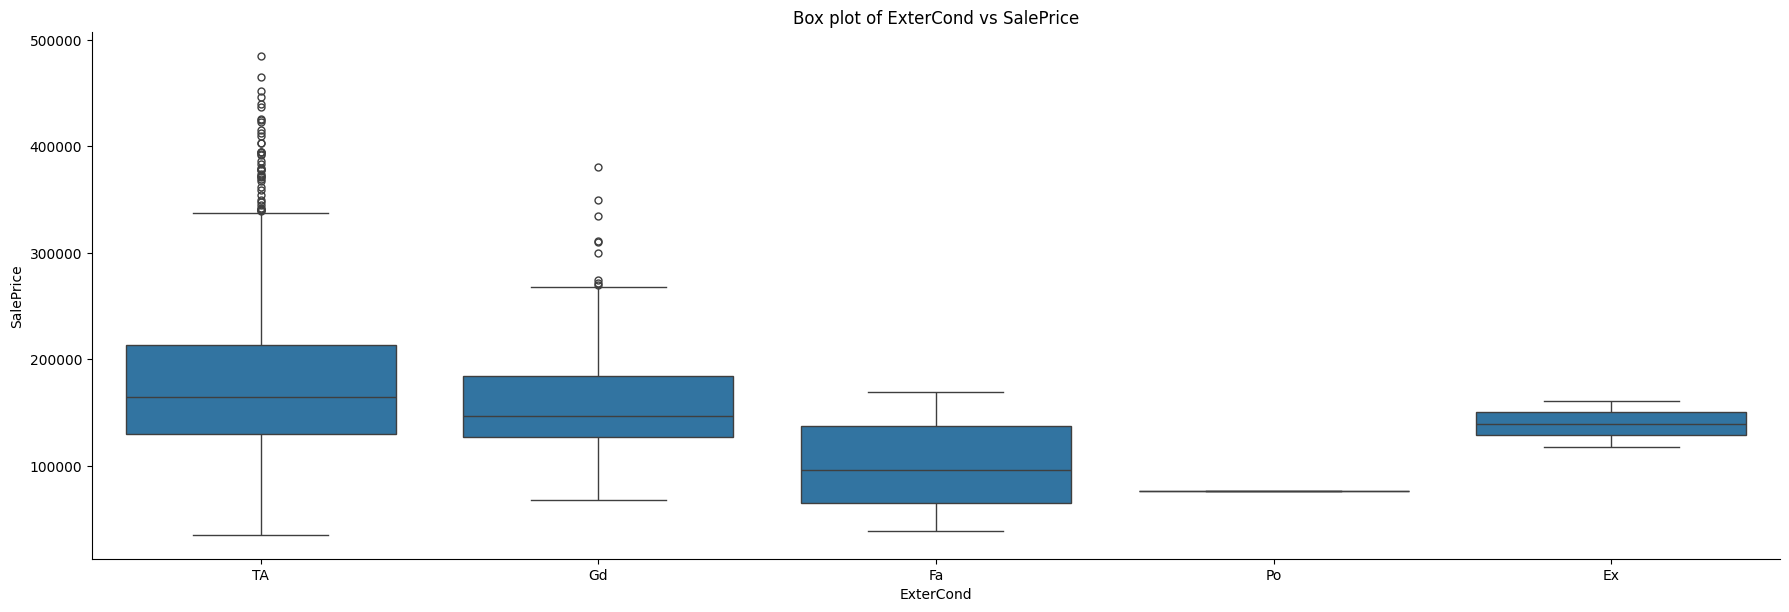

<Figure size 3000x1000 with 0 Axes>

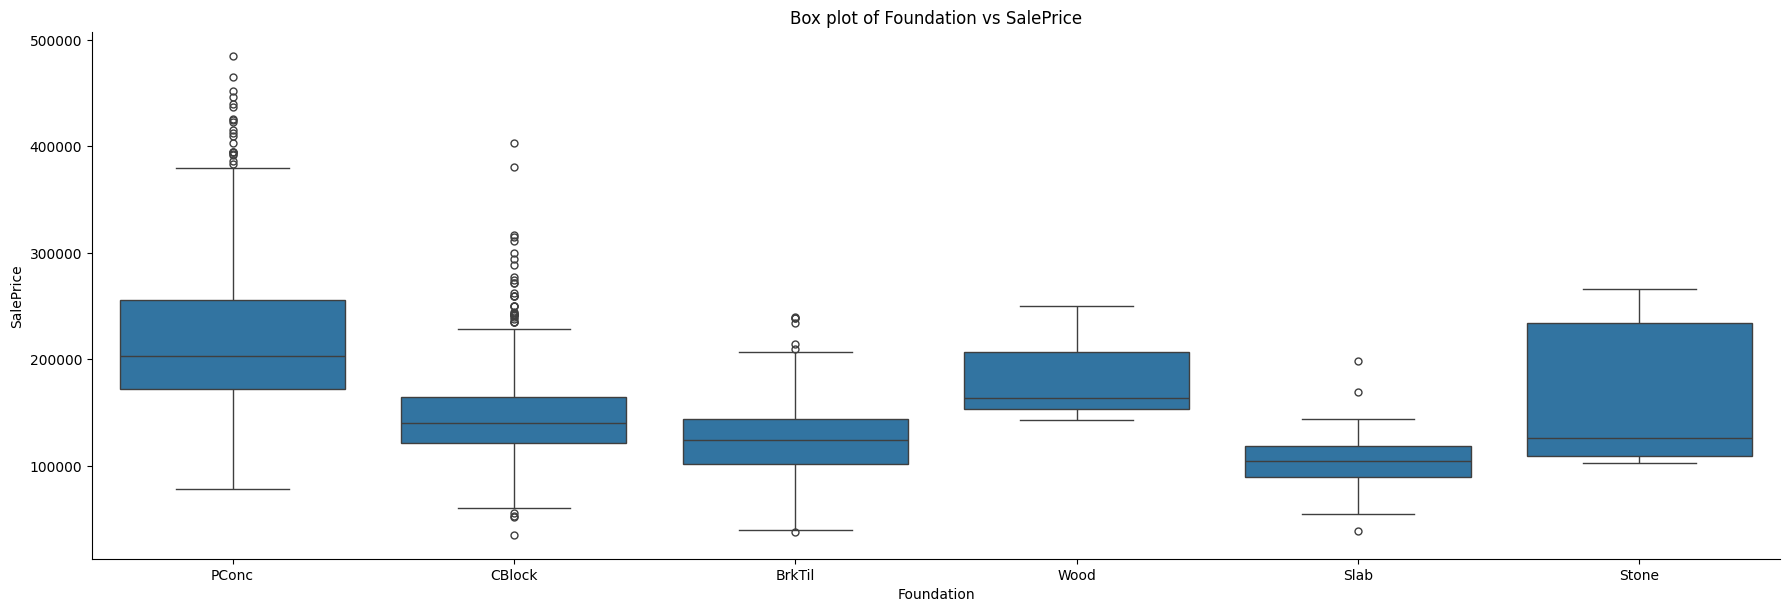

<Figure size 3000x1000 with 0 Axes>

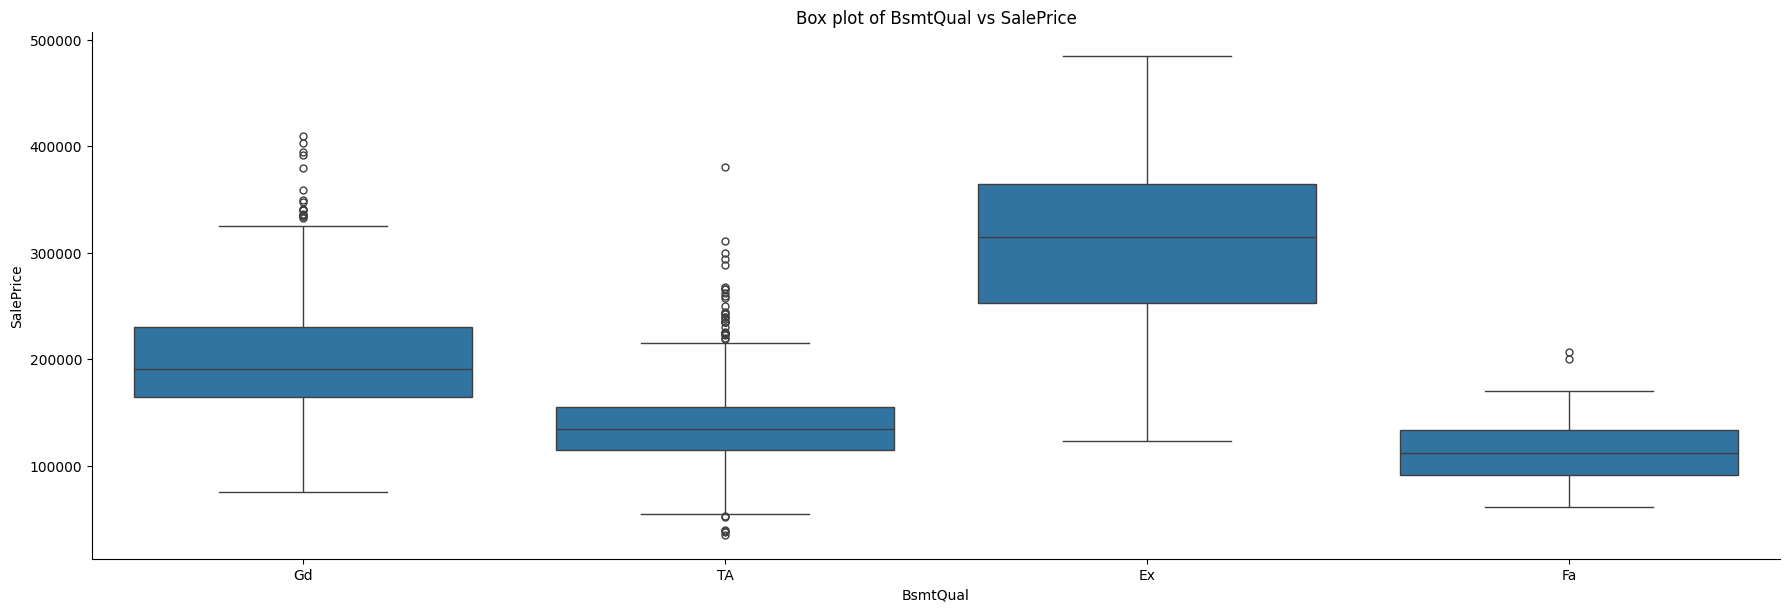

<Figure size 3000x1000 with 0 Axes>

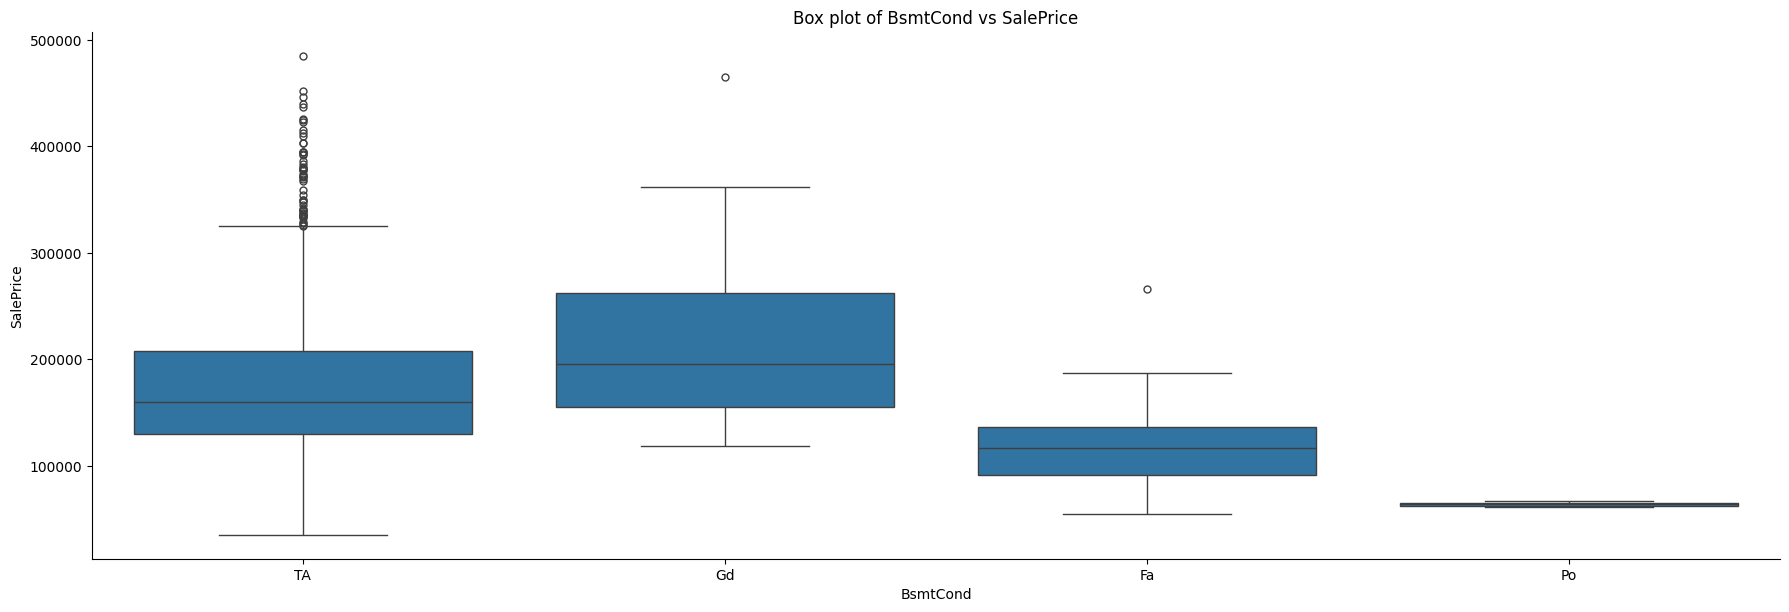

<Figure size 3000x1000 with 0 Axes>

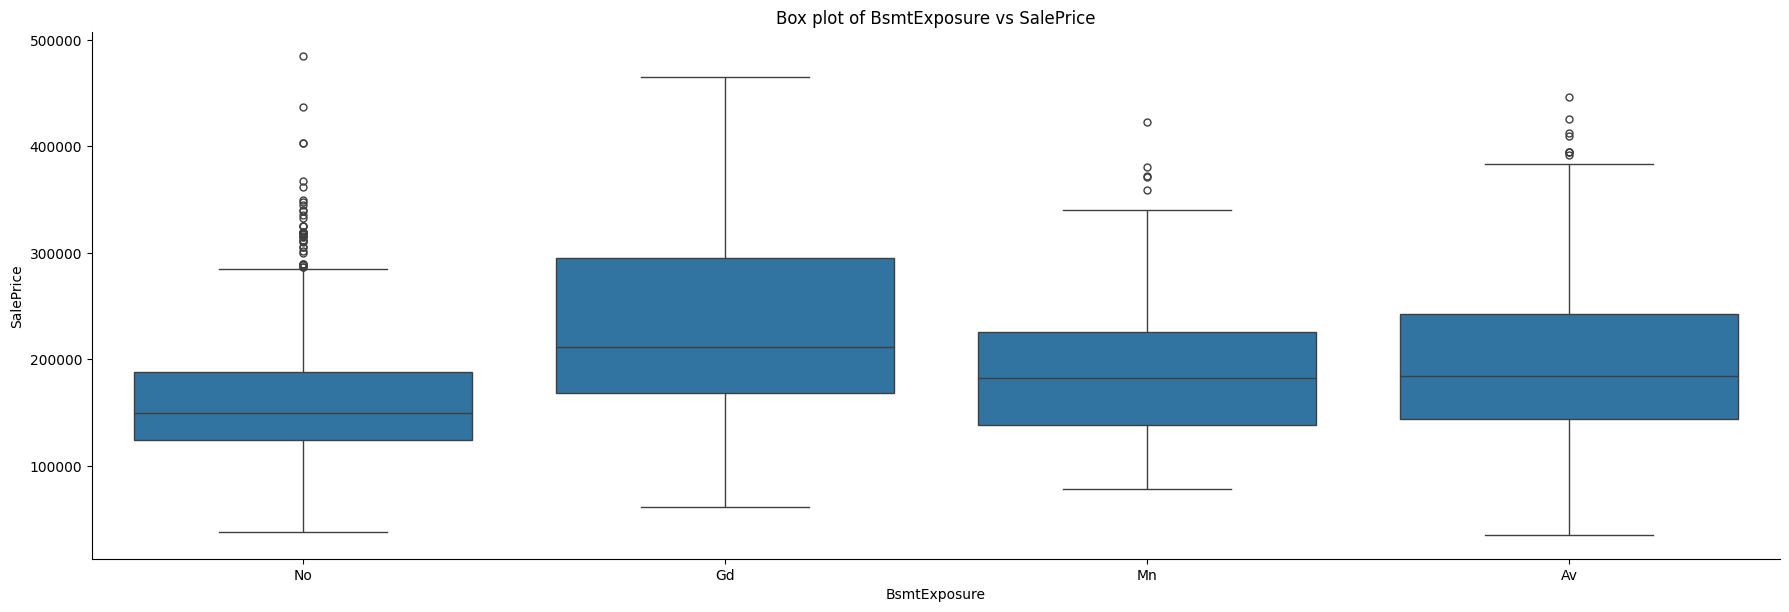

<Figure size 3000x1000 with 0 Axes>

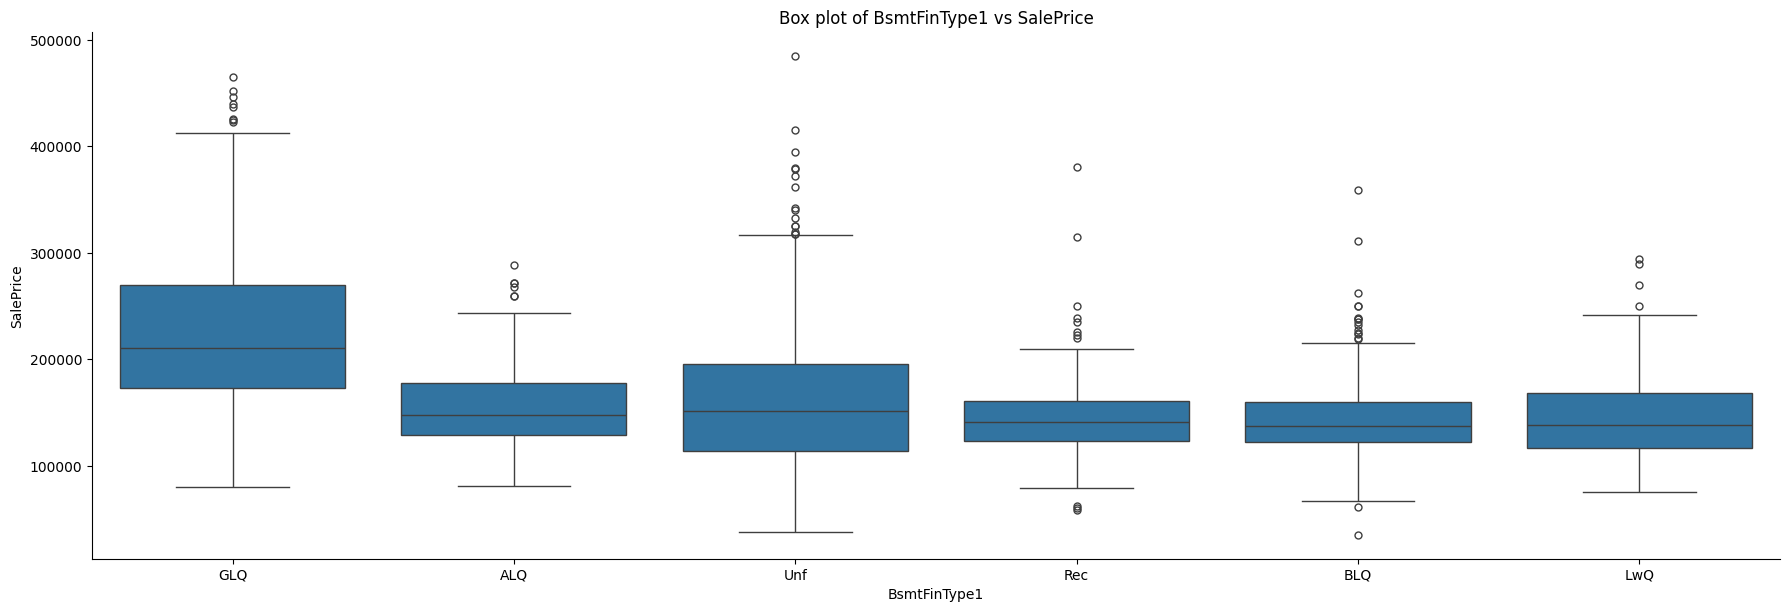

<Figure size 3000x1000 with 0 Axes>

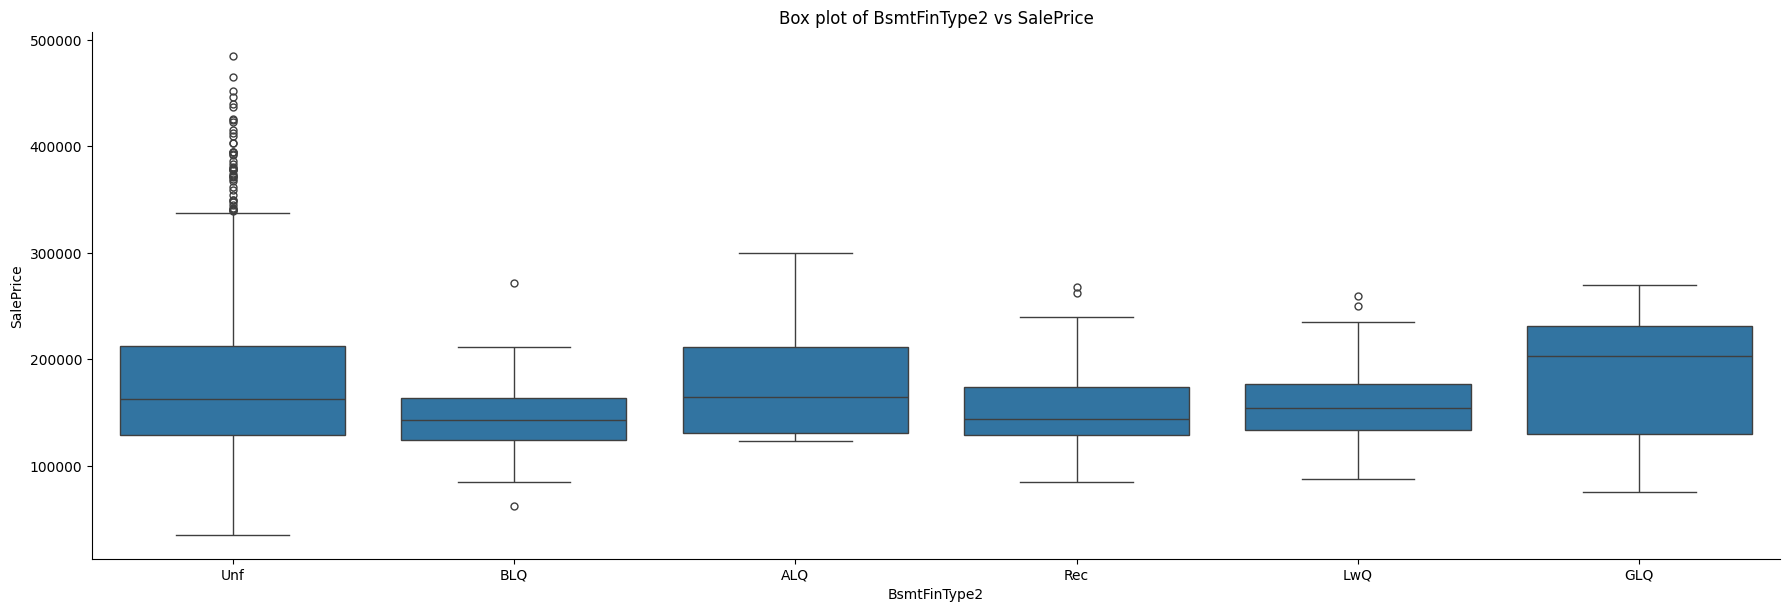

<Figure size 3000x1000 with 0 Axes>

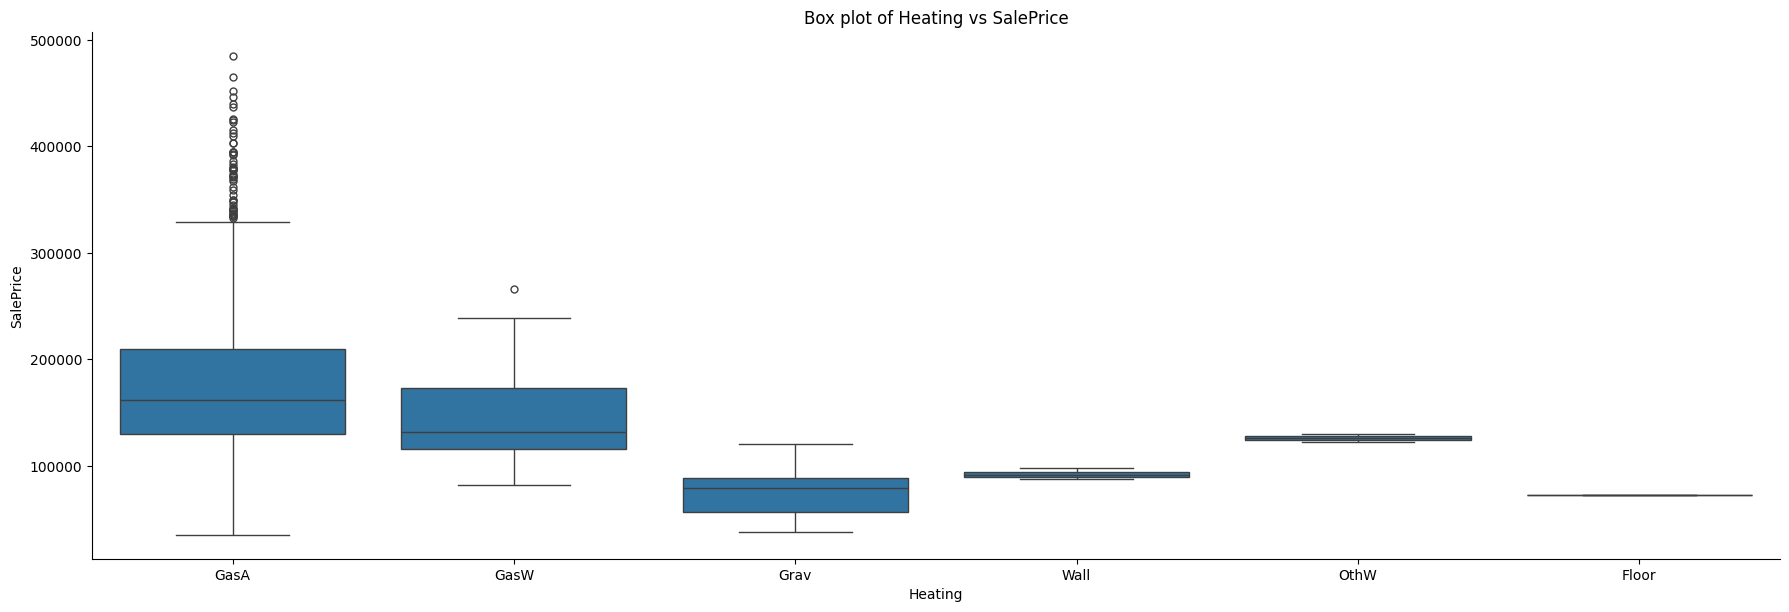

<Figure size 3000x1000 with 0 Axes>

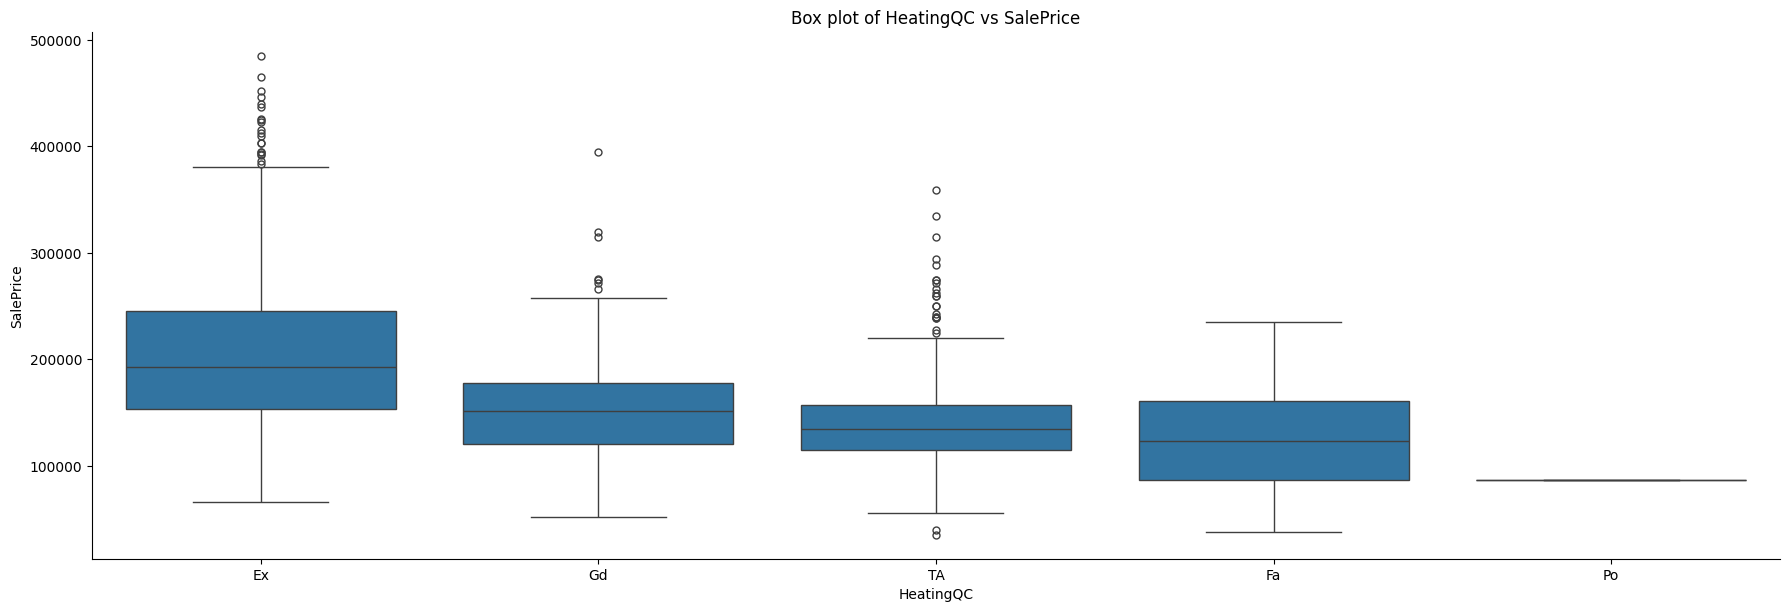

<Figure size 3000x1000 with 0 Axes>

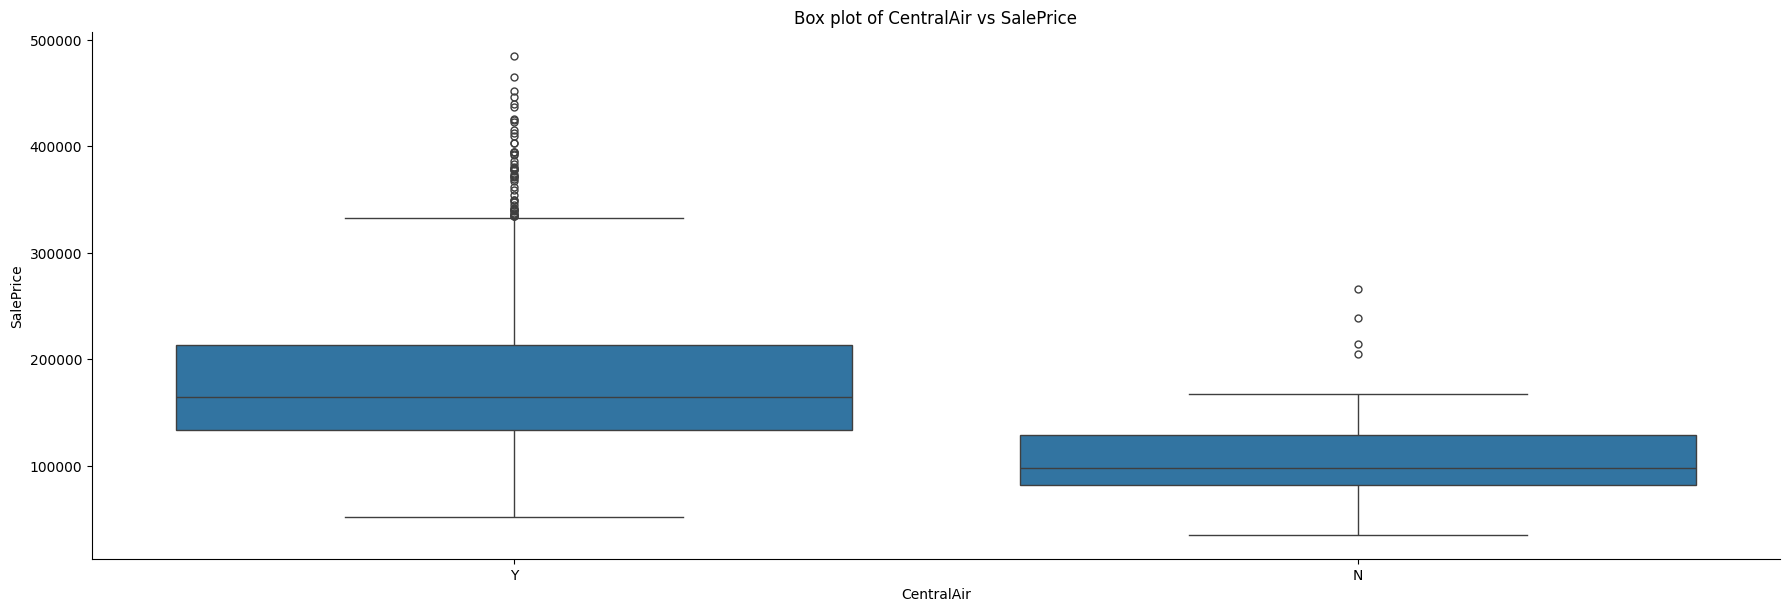

<Figure size 3000x1000 with 0 Axes>

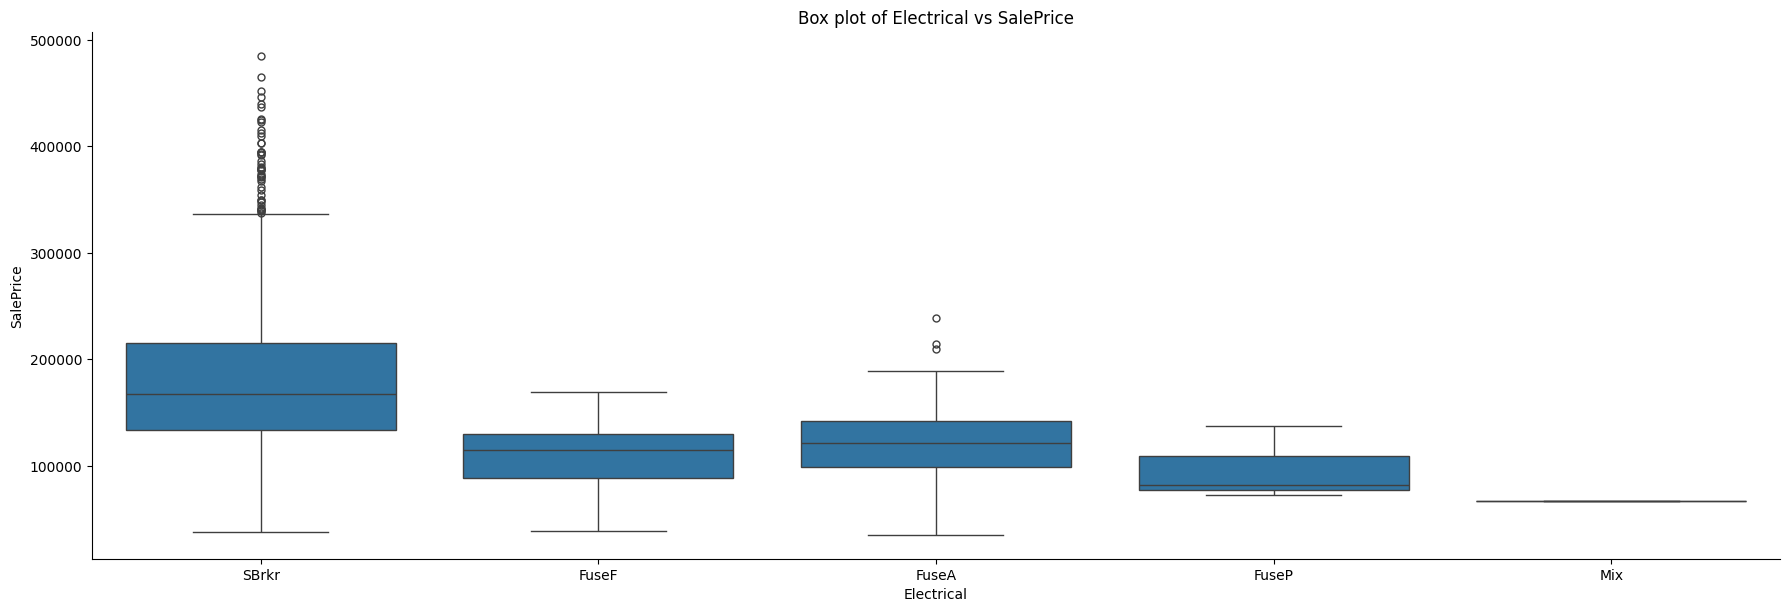

<Figure size 3000x1000 with 0 Axes>

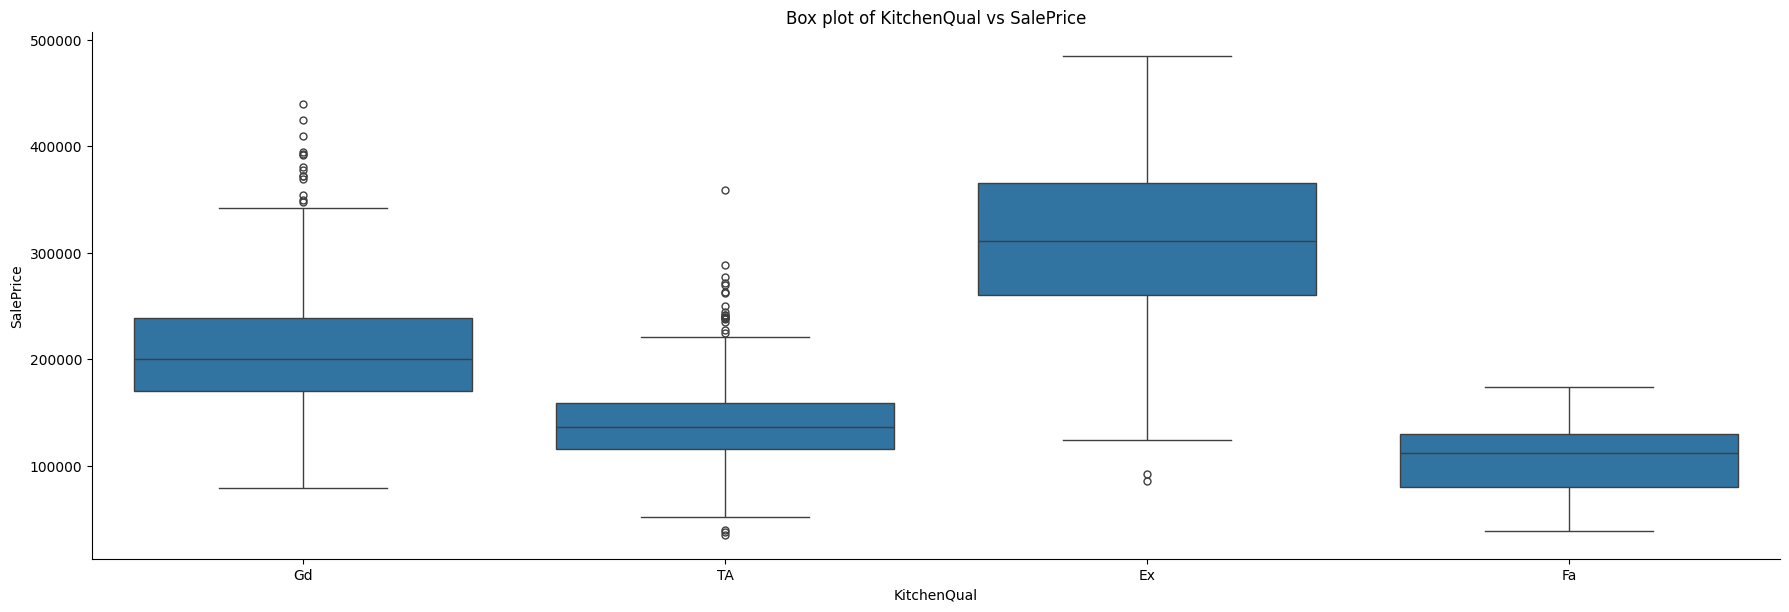

<Figure size 3000x1000 with 0 Axes>

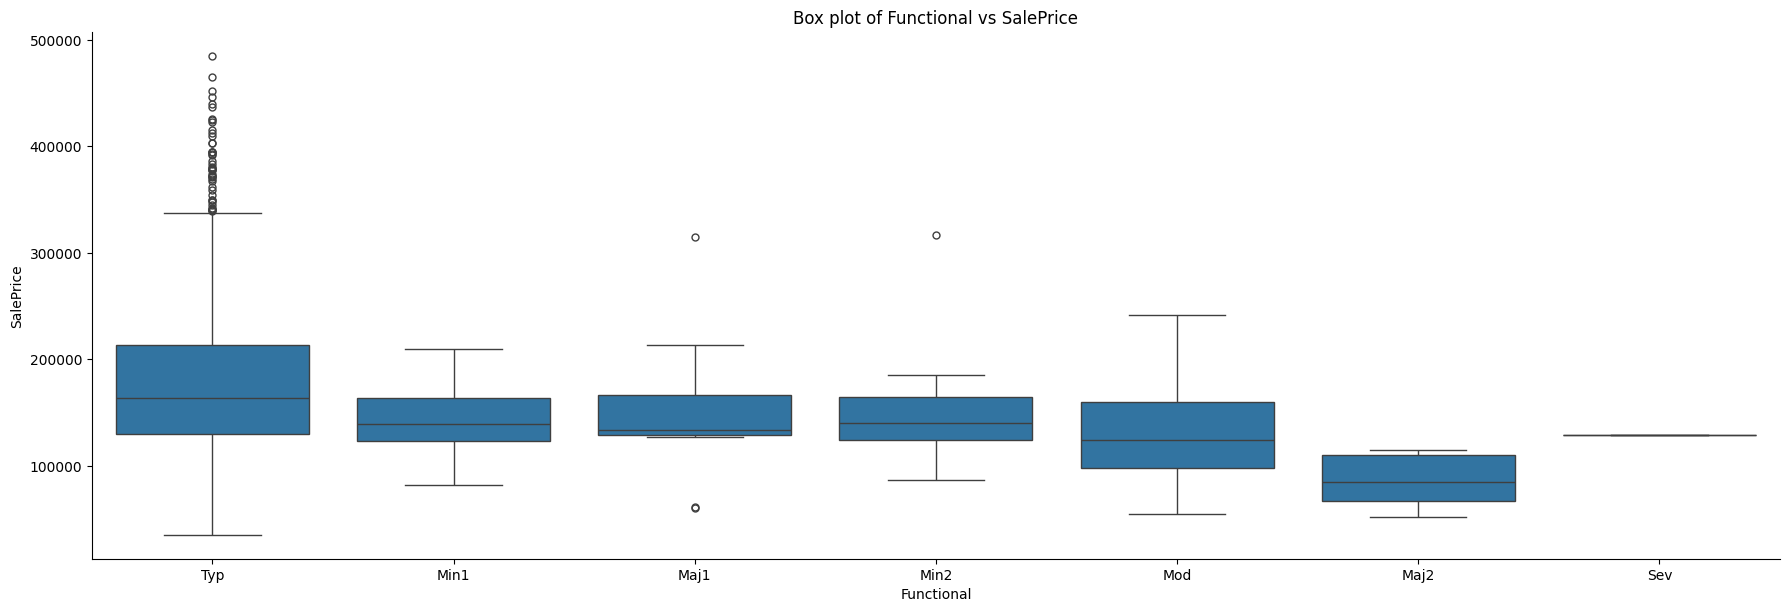

<Figure size 3000x1000 with 0 Axes>

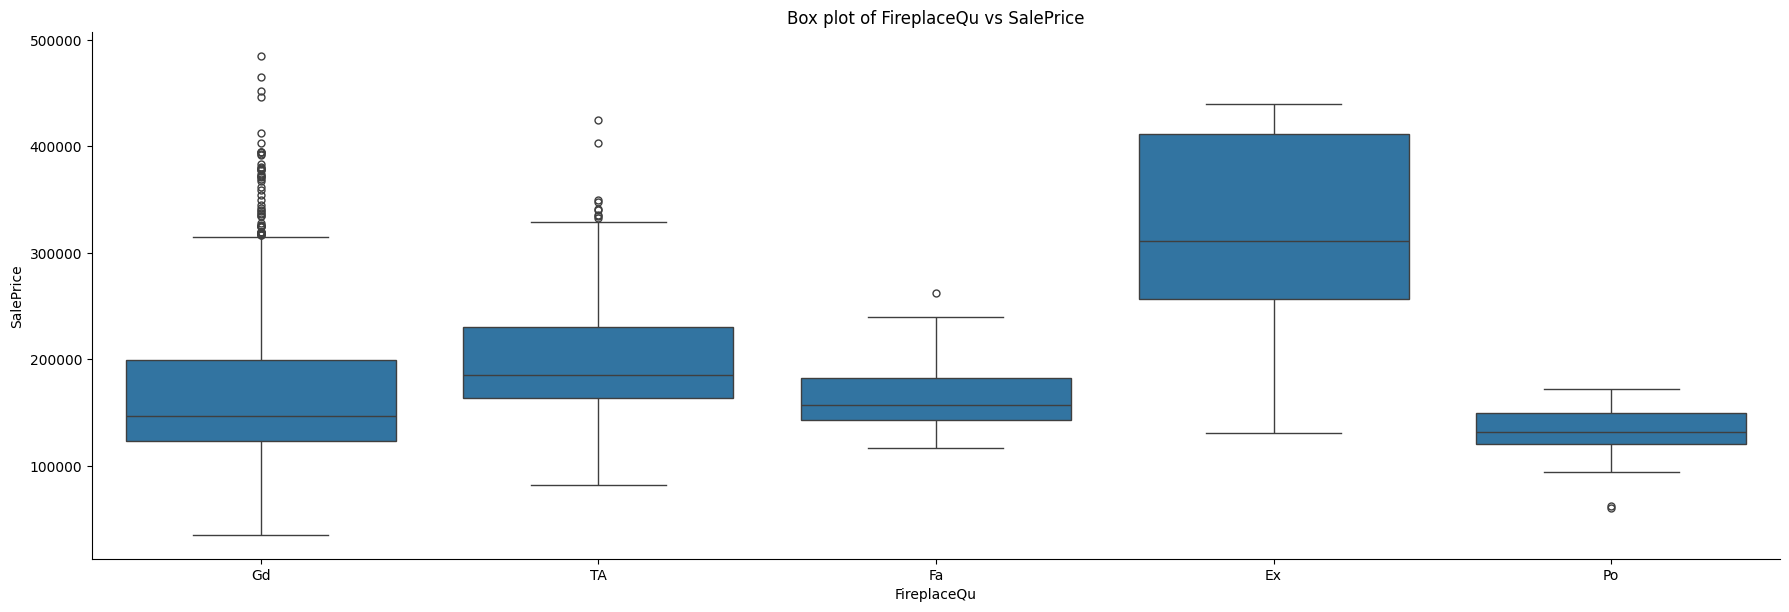

<Figure size 3000x1000 with 0 Axes>

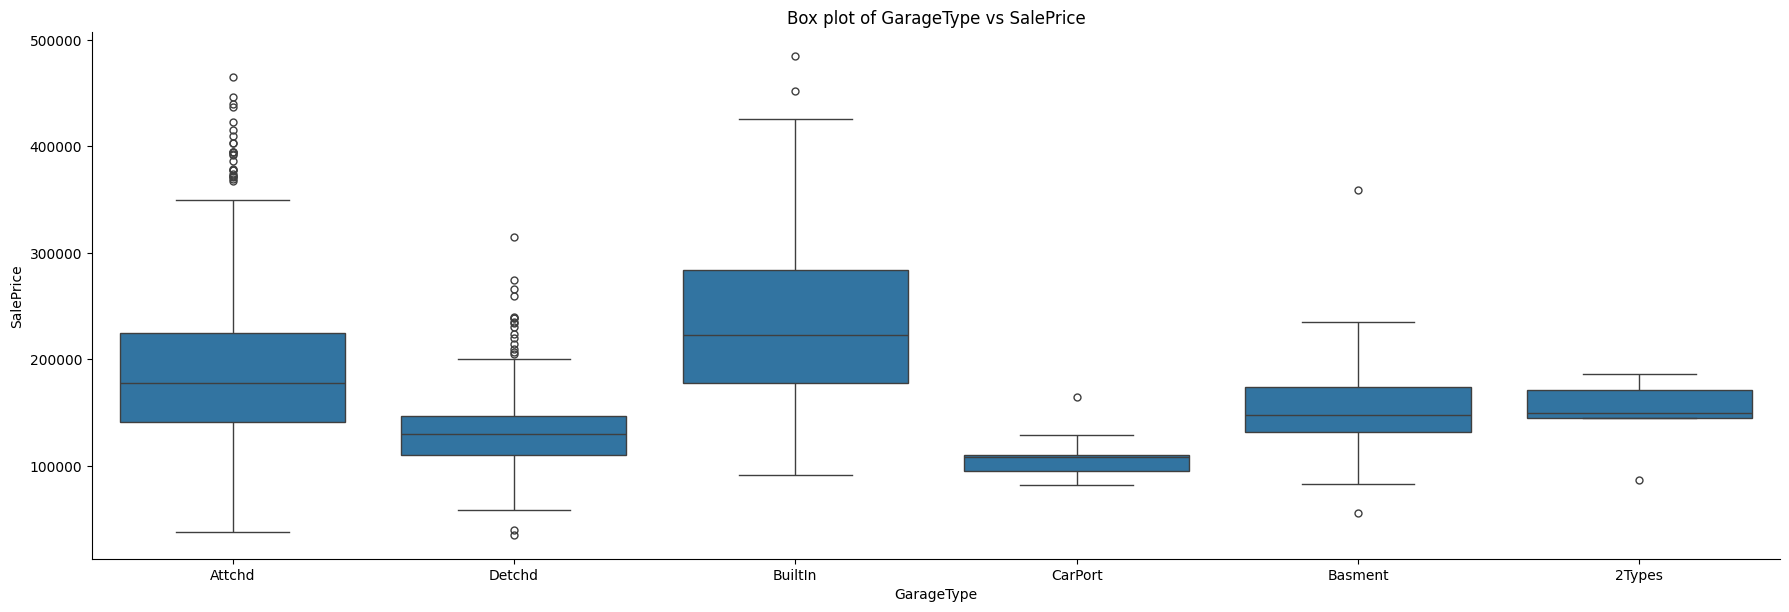

<Figure size 3000x1000 with 0 Axes>

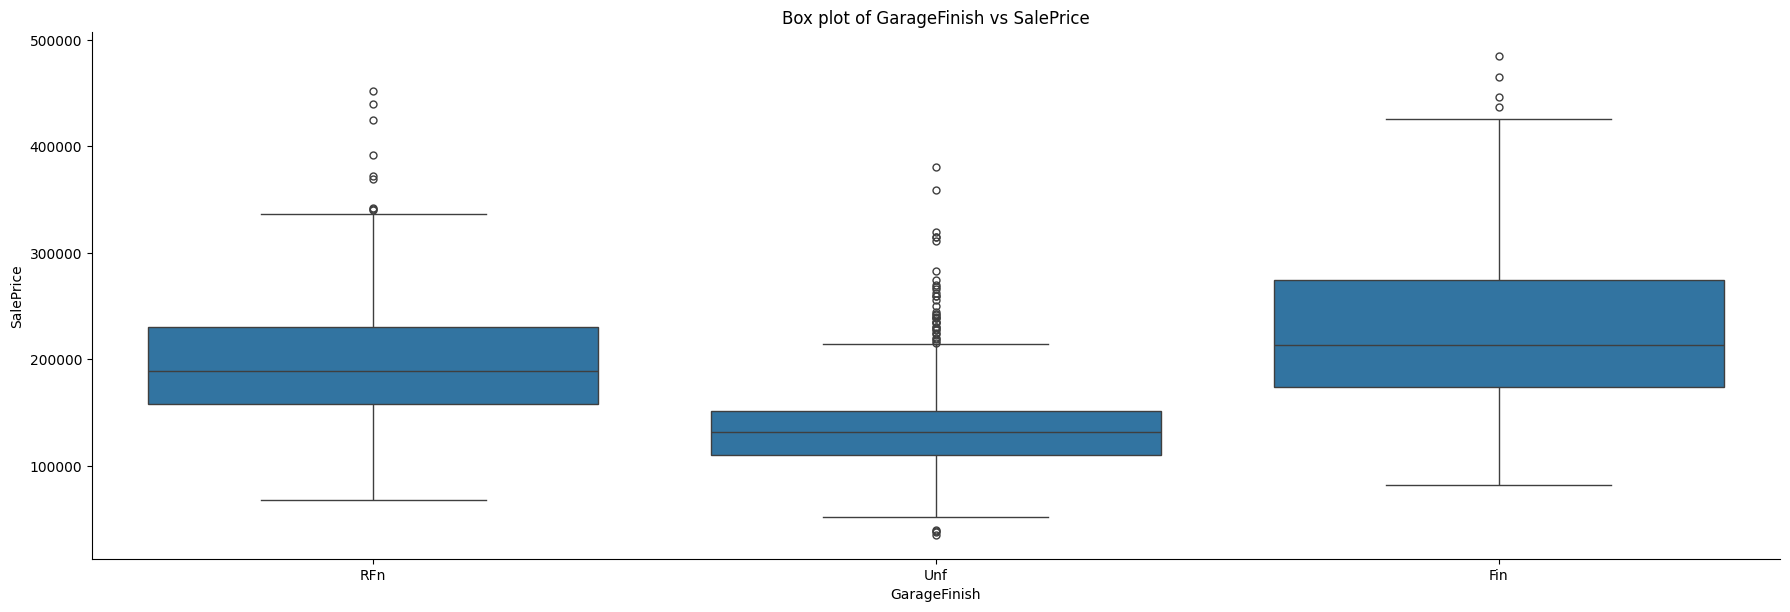

<Figure size 3000x1000 with 0 Axes>

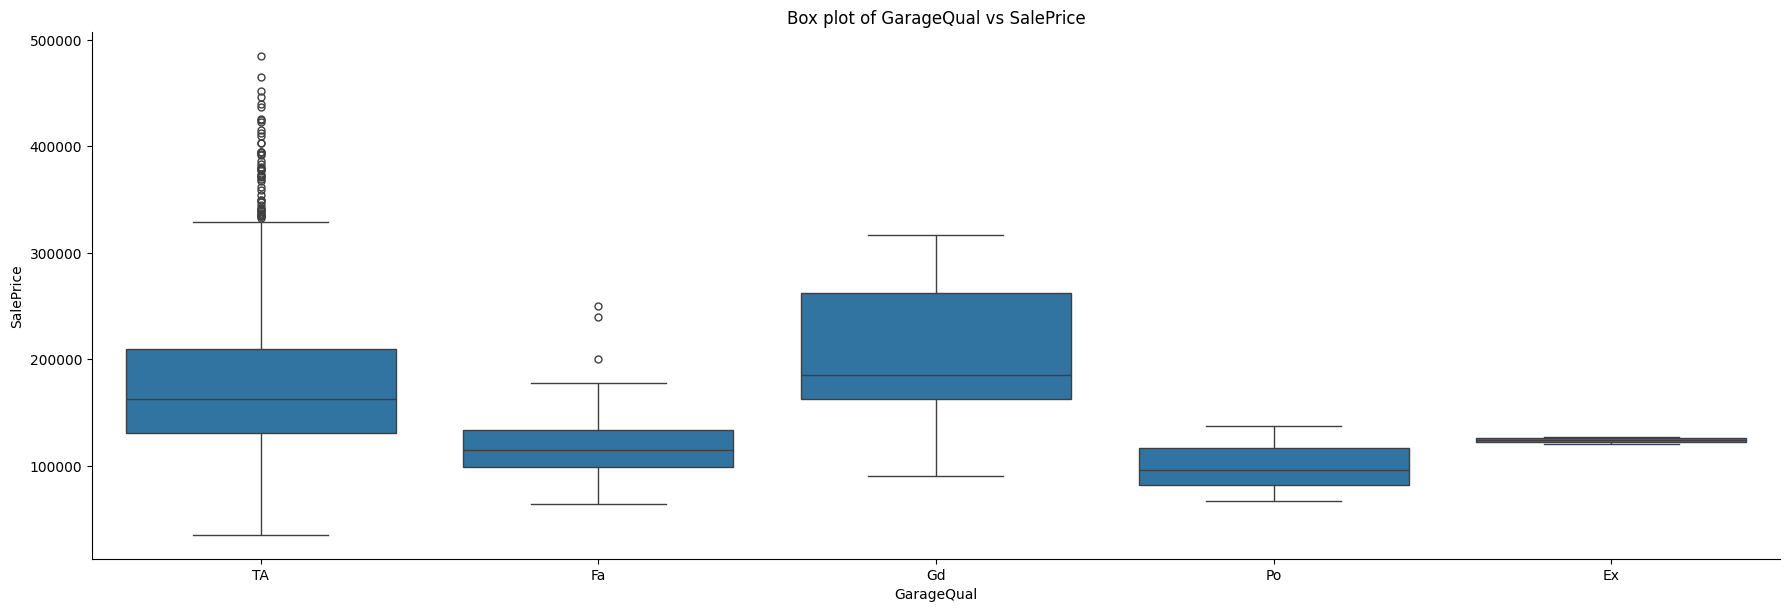

<Figure size 3000x1000 with 0 Axes>

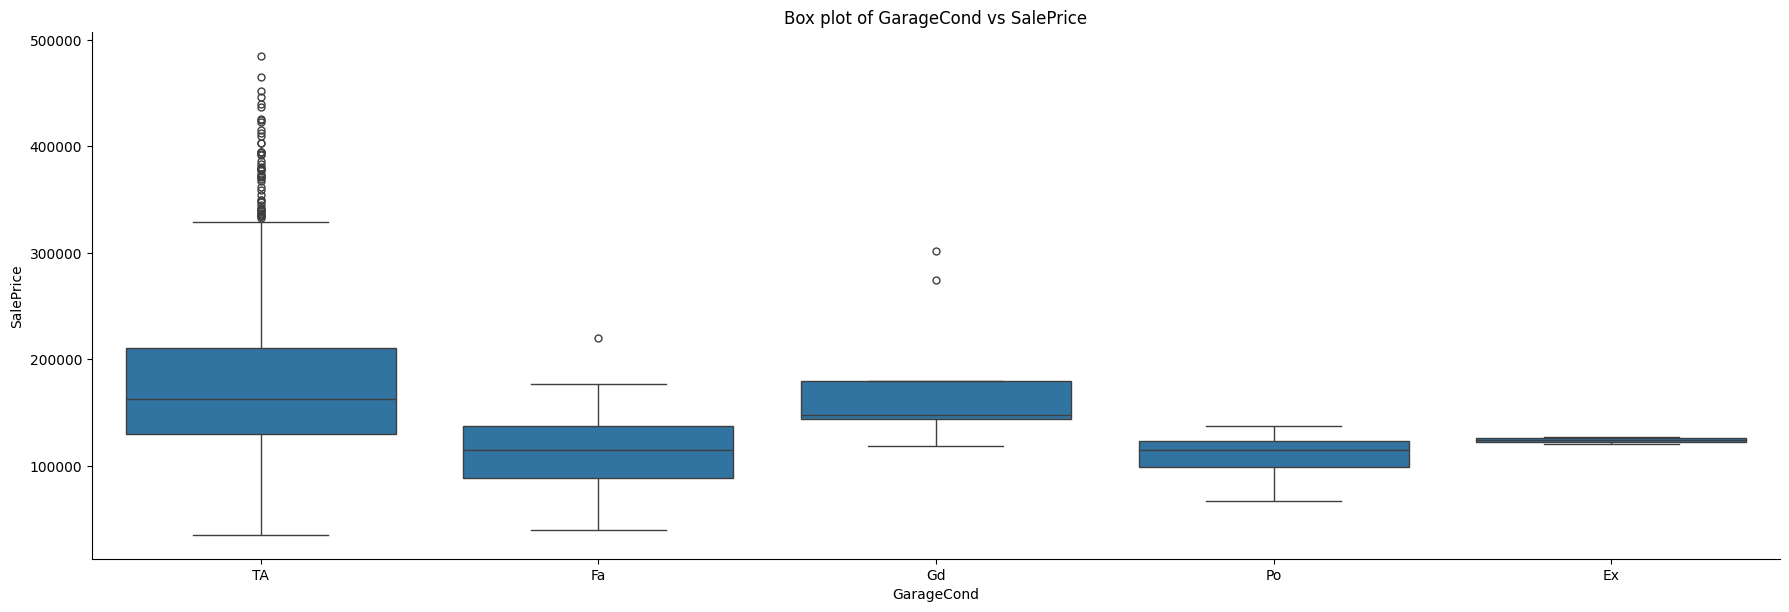

<Figure size 3000x1000 with 0 Axes>

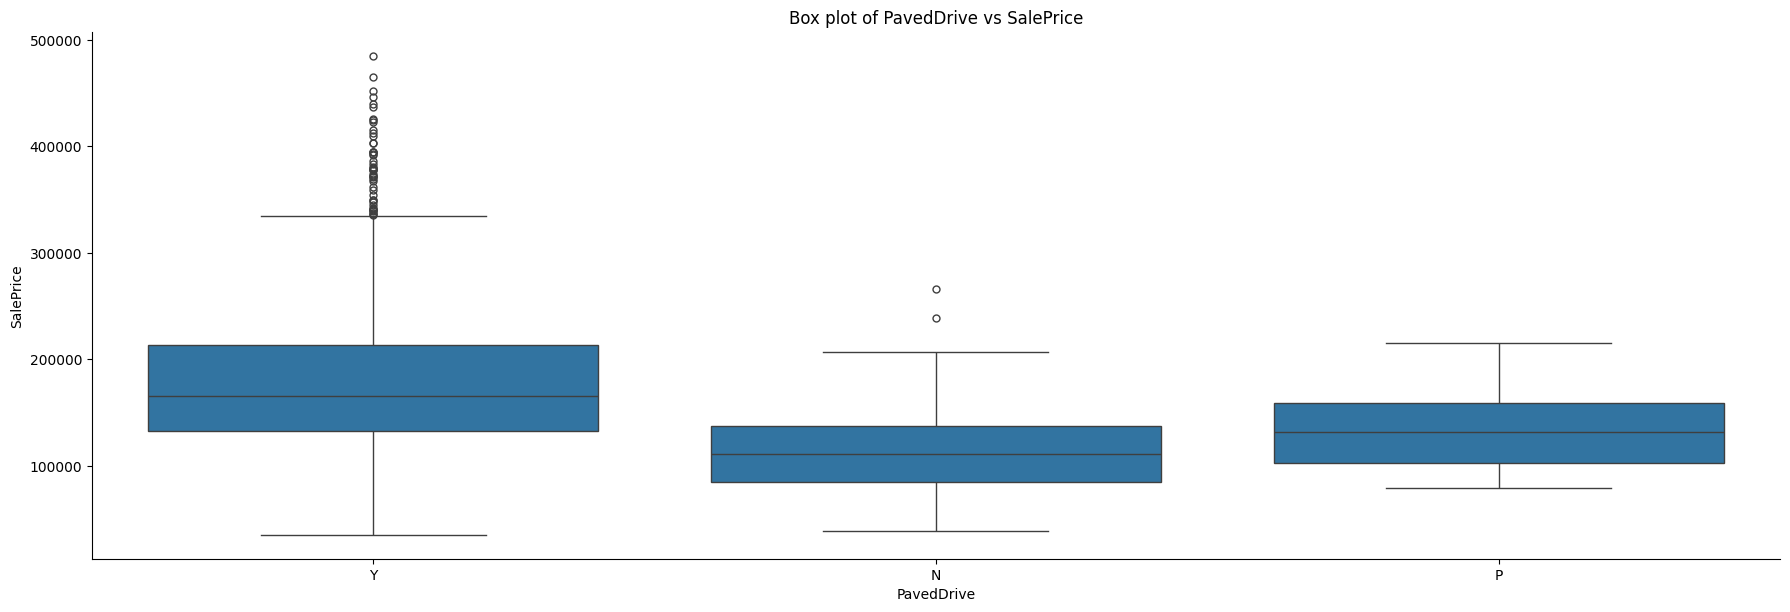

<Figure size 3000x1000 with 0 Axes>

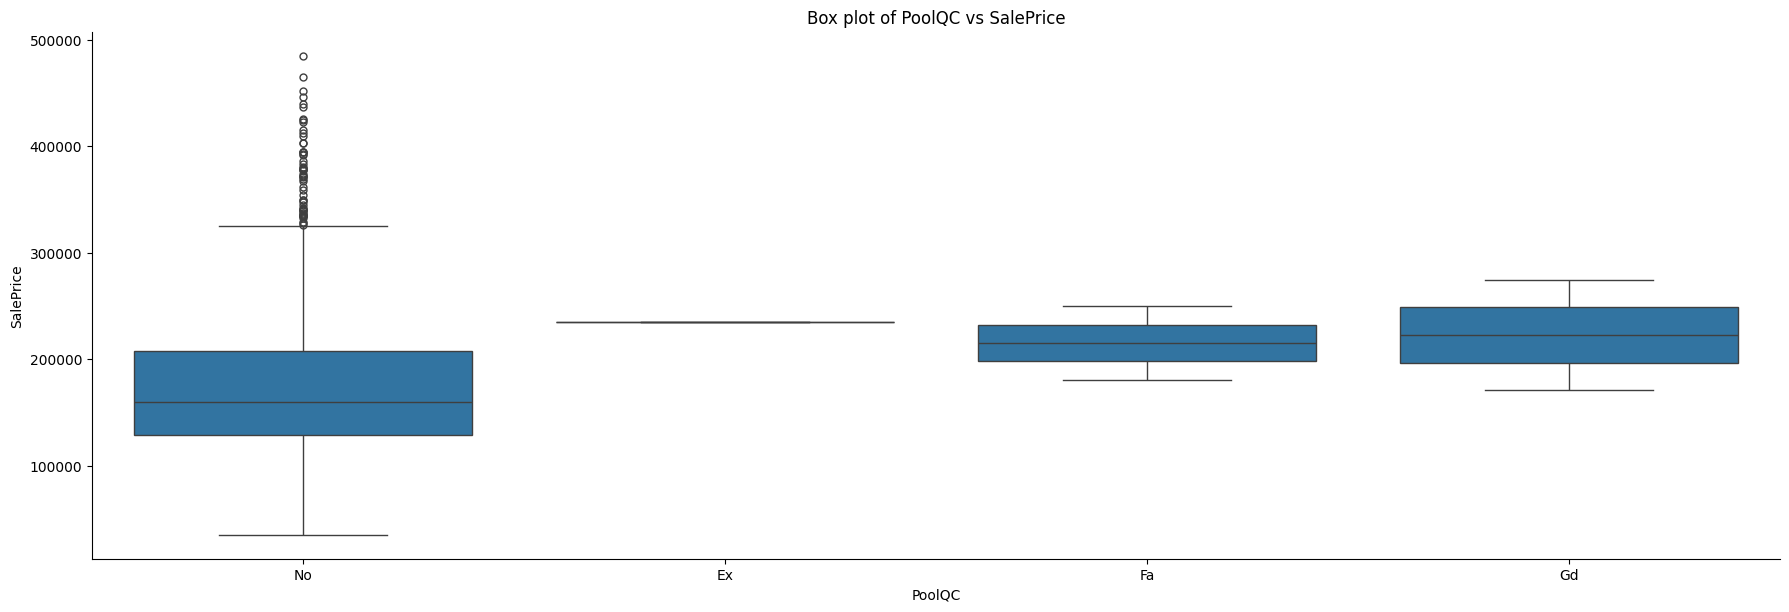

<Figure size 3000x1000 with 0 Axes>

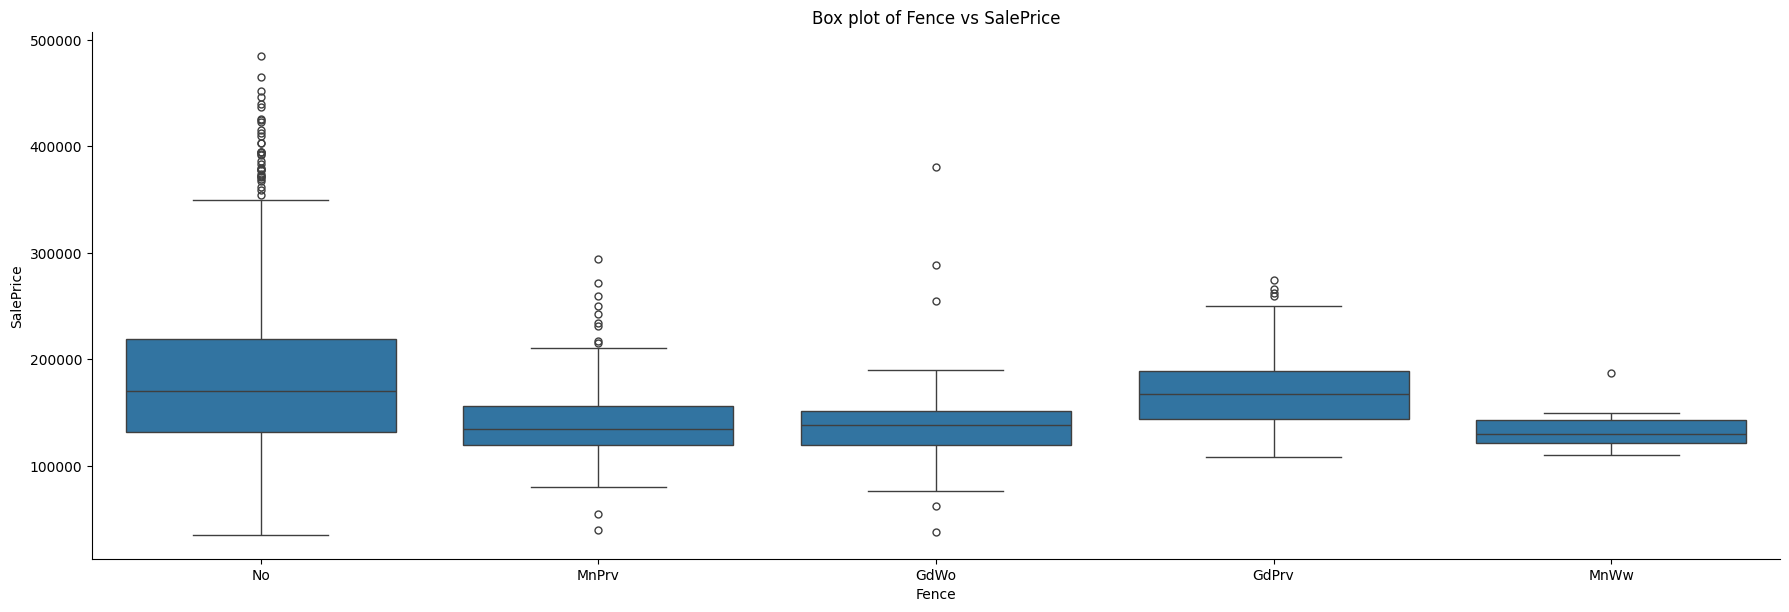

<Figure size 3000x1000 with 0 Axes>

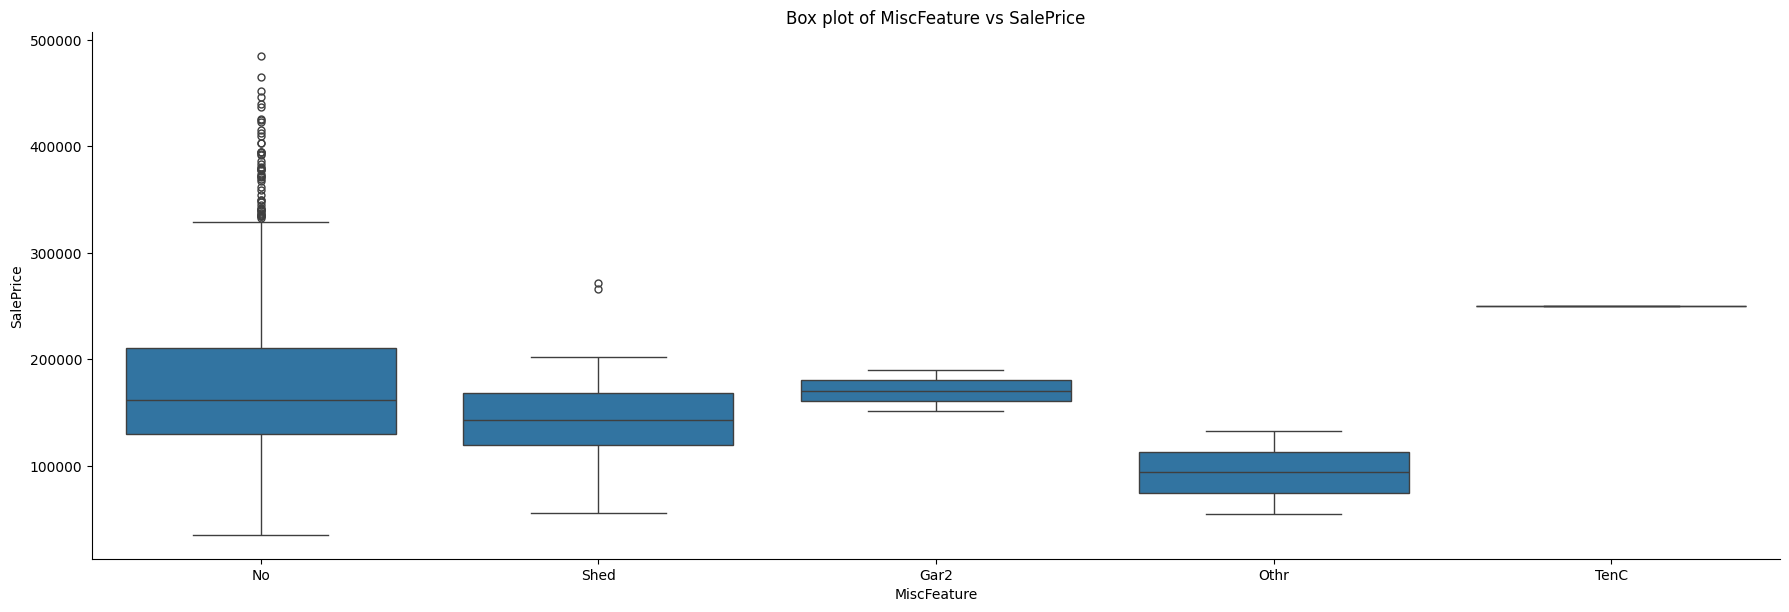

<Figure size 3000x1000 with 0 Axes>

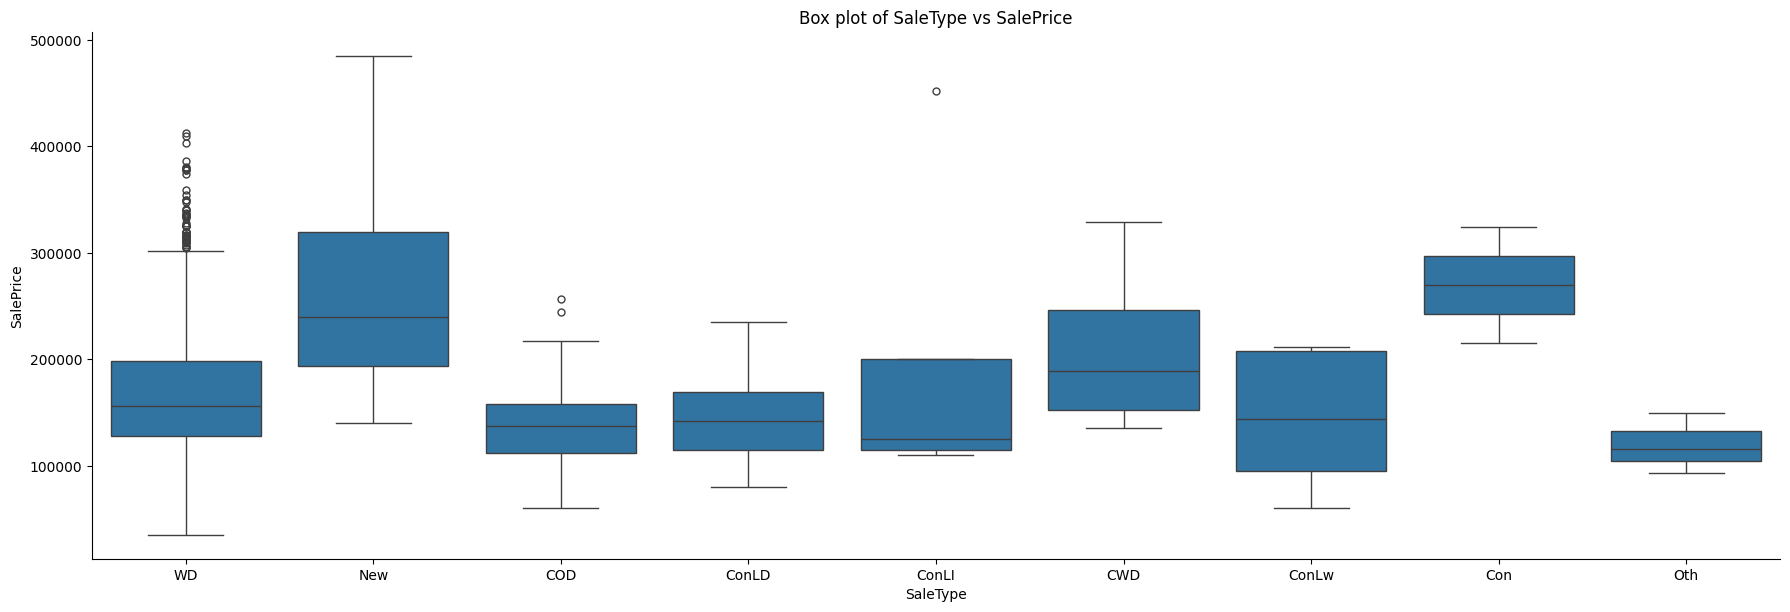

<Figure size 3000x1000 with 0 Axes>

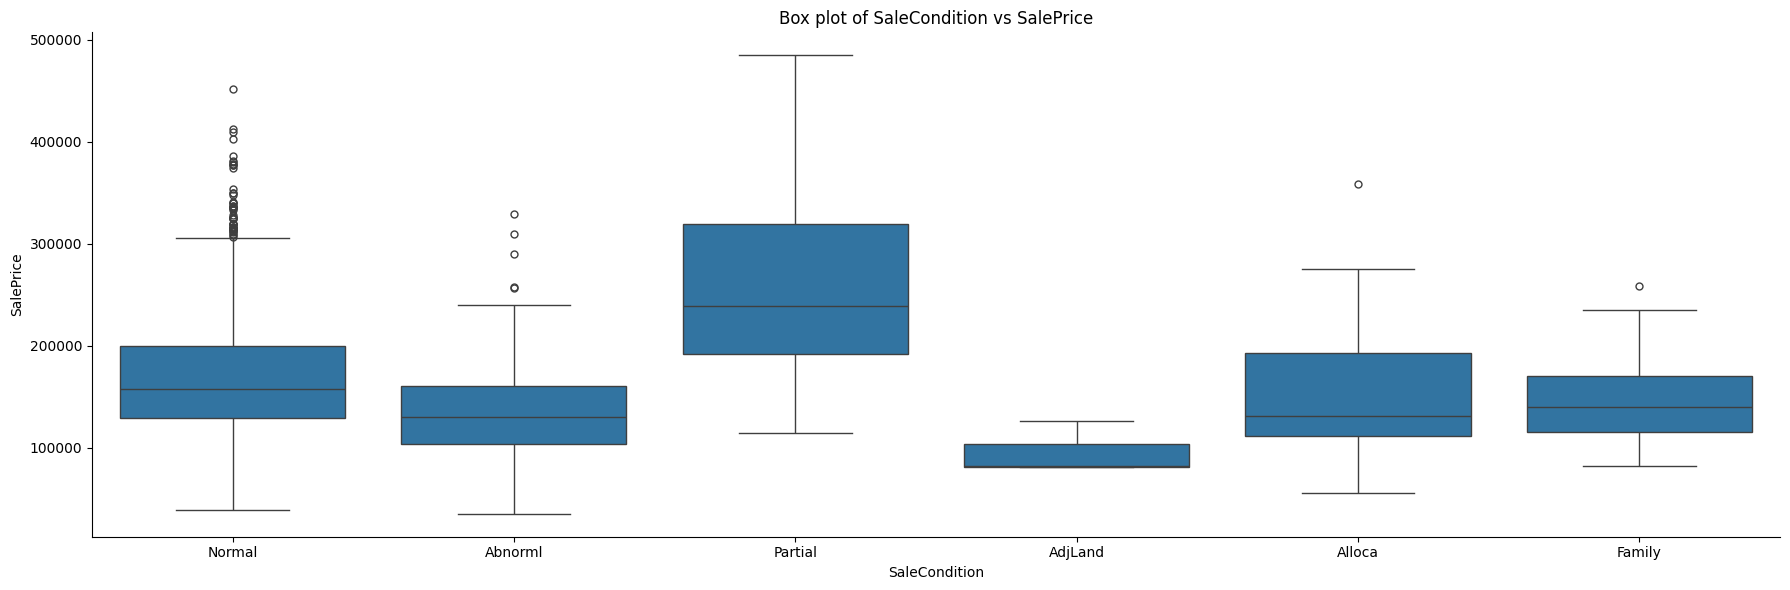

In [15]:
# Lặp qua từng biến phân loại và vẽ biểu đồ boxplot
for feature in cat_features:
    plt.figure(figsize=(30, 10))
    sns.catplot(data=df_train, x=feature, y="SalePrice", kind="box", height=6, aspect=3)
    plt.title("Box plot of {} vs SalePrice".format(feature))

plt.tight_layout()
plt.show()